 # **Overview**


The objective of this project is to scrape, analyze, and compare the box office performance of movies from different regional Indian cinema industries (Tollywood, Mollywood, Bollywood, Gollywood, Marathi, and Bengali) for the years 2019–2024. The analysis aims to derive insights on box office trends, earnings correlation, budget efficiency, and movie success metrics.

# **Data Scraping**

In [10]:
import requests 
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# my drive path for chrome
driver = r"C:\Users\skist\Innomatics notes or programs\chromedriver.exe"  

In [12]:
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    

In [13]:
# Industry URLs
# South indian
tollywood_urls = [
    'https://www.sacnilk.com/entertainmenttopbar/Tollywood_Box_Office_2020?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Tollywood_Box_Office_2021?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Tollywood_Box_Office_2022?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Tollywood_Box_Office_2023?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Tollywood_Box_Office_2024?hl=en'
]
mollywood_urls = [
    'https://www.sacnilk.com/entertainmenttopbar/Mollywood_Box_Office_2020?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Mollywood_Box_Office_2021?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Mollywood_Box_Office_2022?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Mollywood_Box_Office_2023?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Mollywood_Box_Office_2024?hl=en'
]
# North-Central India

bollywood_urls = [
    'https://www.sacnilk.com/entertainmenttopbar/Box_Office_2016?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Box_Office_2017?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Box_Office_2018?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Bollywood_Box_Office_2019?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Bollywood_Box_Office_2020?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Bollywood_Box_Office_2021?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Bollywood_Box_Office_2022?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Bollywood_Box_Office_2023?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Bollywood_Box_Office_2024?hl=en'
]
# Western India
gollywood_urls = [
    'https://www.sacnilk.com/entertainmenttopbar/Gollywood_Box_Office_2019?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Gollywood_Box_Office_2020?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Gollywood_Box_Office_2021?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Gollywood_Box_Office_2022?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Gollywood_Box_Office_2023?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Gollywood_Box_Office_2024?hl=en'
]

marathi_urls = [
    'https://www.sacnilk.com/entertainmenttopbar/Marathi_Box_Office_2019?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Marathi_Box_Office_2020?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Marathi_Box_Office_2021?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Marathi_Box_Office_2022?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Marathi_Box_Office_2023?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Marathi_Box_Office_2024?hl=en'
]
# Eastern India
bengali_urls = [
    'https://www.sacnilk.com/entertainmenttopbar/Bengali_Box_Office_2019?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Bengali_Box_Office_2020?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Bengali_Box_Office_2021?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Bengali_Box_Office_2022?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Bengali_Box_Office_2023?hl=en',
    'https://www.sacnilk.com/entertainmenttopbar/Bengali_Box_Office_2024?hl=en'
]



In [14]:
# Define genre mapping
genre_mapping = {
    'Tollywood': ['Action', 'Adventure'],
    'Mollywood': ['Drama', 'Romance'],
    'Bollywood': ['Drama', 'Romance', 'Comedy'],
    'Gollywood': ['Comedy', 'Drama'],
    'Marathi': ['Drama', 'Comedy'],
    'Bengali': ['Drama', 'Mystery']
}

# Function to get genres by industry
def get_genres_by_industry(industry):
    genres = [
        "Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama", 
        "Fantasy", "Historical", "Horror", "Musical", "Mystery", "Romance", 
        "Science Fiction", "Thriller", "War", "Western", "Documentary", "Family", "Sports"
    ]
    return genre_mapping.get(industry, genres)

# Function to scrape data
def scrape_box_office_data(urls, industry, india_net_column, region):
    all_data = []
    for url in urls:
        try:
            print(f"Scraping data from: {url}")
            response = requests.get(url, headers=headers)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, 'html.parser')

            table = soup.find('table')
            if table:
                rows = table.find_all('tr')[1:]  # Skip header row
                for row in rows:
                    cols = [col.text.strip() for col in row.find_all('td')]
                    if len(cols) >= 8:
                        released_date, movie, worldwide, india_net, india_gross, overseas, budget, verdict = cols[:8]

                        # Get genres and languages
                        genres_list = get_genres_by_industry(industry)
                        genres_str = ', '.join(genres_list)

                        original_languages = {
                            'Tollywood': 'Telugu',
                            'Mollywood': 'Malayalam',
                            'Bollywood': 'Hindi',
                            'Gollywood': 'Gujarati',
                            'Marathi': 'Marathi',
                            'Bengali': 'Bengali'
                        }.get(industry, 'Unknown')

                        dubbed_languages = {
                            'Tollywood': ['Hindi', 'Malayalam', 'Marathi', 'Gujarati', 'Bengali'],
                            'Mollywood': ['Telugu', 'Hindi', 'Marathi', 'Gujarati', 'Bengali'],
                            'Bollywood': ['Telugu', 'Malayalam', 'Marathi', 'Gujarati', 'Bengali'],
                            'Gollywood': ['Telugu', 'Malayalam', 'Marathi', 'Bengali'],
                            'Marathi': ['Telugu', 'Malayalam', 'Bengali', 'Hindi'],
                            'Bengali': ['Telugu', 'Hindi', 'Malayalam', 'Marathi', 'Gujarati']
                        }.get(industry, ['Unknown'])

                        dubbed_languages_str = ', '.join(dubbed_languages)
                        status = 'Released'

                        all_data.append([
                            released_date, movie, worldwide, india_net, india_gross,
                            overseas, budget, verdict, genres_str, industry, original_languages,
                            dubbed_languages_str, status, region
                        ])
            else:
                print(f"No table found on {url}")
        except requests.exceptions.RequestException as e:
            print(f"Network error while scraping {url}: {e}")
        except Exception as e:
            print(f"Unexpected error while scraping {url}: {e}")

    columns = [
        'Released Date', 'Movie', 'Worldwide', india_net_column, 'India Gross',
        'Overseas', 'Budget', 'Verdict', 'Genres', 'Industry', 'Original Languages',
        'Dubbed Languages', 'Status', 'Region'
    ]
    return pd.DataFrame(all_data, columns=columns)

# Example usage (ensure these URL lists are defined)
# tollywood_urls = [...]
# mollywood_urls = [...]
# all_data = scrape_box_office_data(tollywood_urls, 'Tollywood', 'India Telugu Net', 'South India')



# Example usage with regional information
tollywood_data = scrape_box_office_data(tollywood_urls, 'Tollywood', 'India Telugu Net', 'South India')
mollywood_data = scrape_box_office_data(mollywood_urls, 'Mollywood', 'India Malayalam Net', 'South India')
bollywood_data = scrape_box_office_data(bollywood_urls, 'Bollywood', 'India Hindi Net', 'North-Central India')
gollywood_data = scrape_box_office_data(gollywood_urls, 'Gollywood', 'India Gujarati Net', 'Western India')
marathi_data = scrape_box_office_data(marathi_urls, 'Marathi', 'India Marathi Net', 'Western India')
bengali_data = scrape_box_office_data(bengali_urls, 'Bengali', 'India Bengali Net', 'Eastern India')

# Combine all data
all_data = pd.concat([tollywood_data, mollywood_data, bollywood_data, gollywood_data, marathi_data, bengali_data], ignore_index=True)

# Save to CSV
all_data.to_csv('all_data_combined_box_office_data_with_multiple_genres.csv', index=False)
print(f"Combined data saved to 'all_data_combined_box_office_data_with_multiple_genres.csv'")

Scraping data from: https://www.sacnilk.com/entertainmenttopbar/Tollywood_Box_Office_2020?hl=en
Scraping data from: https://www.sacnilk.com/entertainmenttopbar/Tollywood_Box_Office_2021?hl=en
Scraping data from: https://www.sacnilk.com/entertainmenttopbar/Tollywood_Box_Office_2022?hl=en
Scraping data from: https://www.sacnilk.com/entertainmenttopbar/Tollywood_Box_Office_2023?hl=en
Scraping data from: https://www.sacnilk.com/entertainmenttopbar/Tollywood_Box_Office_2024?hl=en
Scraping data from: https://www.sacnilk.com/entertainmenttopbar/Mollywood_Box_Office_2020?hl=en
Scraping data from: https://www.sacnilk.com/entertainmenttopbar/Mollywood_Box_Office_2021?hl=en
Scraping data from: https://www.sacnilk.com/entertainmenttopbar/Mollywood_Box_Office_2022?hl=en
Scraping data from: https://www.sacnilk.com/entertainmenttopbar/Mollywood_Box_Office_2023?hl=en
Scraping data from: https://www.sacnilk.com/entertainmenttopbar/Mollywood_Box_Office_2024?hl=en
Scraping data from: https://www.sacnilk.

In [8]:
all_data

Released Date                                    Movie Worldwide  \
0           25 Dec                  Solo Brathuke So Better      22.3   
1           13 Mar                                    Madha       0.5   
2           13 Mar                                   Arjuna      0.35   
3           13 Mar                                      302      0.07   
4           13 Mar                                   Shivan      0.25   
...            ...                                      ...       ...   
1913        19 Jan                                     Asha         0   
1914        19 Jan                            Sentimentaaal      0.12   
1915        19 Jan                                    Hubba      0.36   
1916        12 Jan                             Bijoyar Pore      0.28   
1917        12 Jan  Shri Swapankumarer Badami Hyenar Kobole      0.53   

     India Telugu Net India Gross Overseas Budget Verdict             Genres  \
0                18.1        21.1      1.2     20     Hit  Action, Adventure   
1                0.35        0.42     0.08      3    None  Action, Adventure   
2                0.25         0.3     0.05      3    None  Action, Adventure   
3                0.05        0.07        0      2    None  Action, Adventure   
4                 0.2        0.23     0.02      2    None  Action, Adventure   
...               ...         ...      ...    ...     ...                ...   
1913              NaN           0        -      1    None     Drama, Mystery   
1914              NaN        0.12        -      1    None     Drama, Mystery   
1915              NaN        0.36        -      1    None     Drama, Mystery   
1916              NaN        0.28        -      1    None     Drama, Mystery   
1917              NaN        0.53        -      1    None     Drama, Mystery   

       Industry Original Languages  \
0     Tollywood             Telugu   
1     Tollywood             Telugu   
2     Tollywood             Telugu   
3     Tollywood             Telugu   
4     Tollywood             Telugu   
...         ...                ...   
1913    Bengali            Bengali   
1914    Bengali            Bengali   
1915    Bengali            Bengali   
1916    Bengali            Bengali   
1917    Bengali            Bengali   

                                  Dubbed Languages    Status         Region  \
0     Hindi, Malayalam, Marathi, Gujarati, Bengali  Released    South India   
1     Hindi, Malayalam, Marathi, Gujarati, Bengali  Released    South India   
2     Hindi, Malayalam, Marathi, Gujarati, Bengali  Released    South India   
3     Hindi, Malayalam, Marathi, Gujarati, Bengali  Released    South India   
4     Hindi, Malayalam, Marathi, Gujarati, Bengali  Released    South India   
...                                            ...       ...            ...   
1913   Telugu, Hindi, Malayalam, Marathi, Gujarati  Released  Eastern India   
1914   Telugu, Hindi, Malayalam, Marathi, Gujarati  Released  Eastern India   
1915   Telugu, Hindi, Malayalam, Marathi, Gujarati  Released  Eastern India   
1916   Telugu, Hindi, Malayalam, Marathi, Gujarati  Released  Eastern India   
1917   Telugu, Hindi, Malayalam, Marathi, Gujarati  Released  Eastern India   

     India Malayalam Net India Hindi Net India Gujarati Net India Marathi Net  \
0                    NaN             NaN                NaN               NaN   
1                    NaN             NaN                NaN               NaN   
2                    NaN             NaN                NaN               NaN   
3                    NaN             NaN                NaN               NaN   
4                    NaN             NaN                NaN               NaN   
...                  ...             ...                ...               ...   
1913                 NaN             NaN                NaN               NaN   
1914                 NaN             NaN                NaN               NaN   
1915                 NaN        

# **Data Analysis**

# Basic Metrics

In [8]:
# Checking Shape of data
all_data.shape

(1905, 19)

In [9]:
# Columns in data
all_data.columns

Index(['Released Date', 'Movie', 'Worldwide', 'India Telugu Net',
       'India Gross', 'Overseas', 'Budget', 'Verdict', 'Genres', 'Industry',
       'Original Languages', 'Dubbed Languages', 'Status', 'Region',
       'India Malayalam Net', 'India Hindi Net', 'India Gujarati Net',
       'India Marathi Net', 'India Bengali Net'],
      dtype='object')

In [10]:
# Overview of the dataset structure
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Released Date        1905 non-null   object
 1   Movie                1905 non-null   object
 2   Worldwide            1905 non-null   object
 3   India Telugu Net     727 non-null    object
 4   India Gross          1905 non-null   object
 5   Overseas             1905 non-null   object
 6   Budget               1905 non-null   object
 7   Verdict              1905 non-null   object
 8   Genres               1905 non-null   object
 9   Industry             1905 non-null   object
 10  Original Languages   1905 non-null   object
 11  Dubbed Languages     1905 non-null   object
 12  Status               1905 non-null   object
 13  Region               1905 non-null   object
 14  India Malayalam Net  355 non-null    object
 15  India Hindi Net      414 non-null    object
 16  India 

# **Datatype Conversions**

In [46]:
# Selecting numeric columns (float64 or int64 types)
numeric_columns = all_data.select_dtypes(include=['float64', 'int64']).columns

# Fill NaN values with 0 in the numeric columns
all_data[numeric_columns] = all_data[numeric_columns].fillna(0)

# For any non-numeric columns (e.g., strings or objects), replace NaN or empty values with '0'
non_numeric_columns = all_data.select_dtypes(exclude=['float64', 'int64']).columns
all_data[non_numeric_columns] = all_data[non_numeric_columns].fillna('0')

# Replace any empty strings ('') with '0' in non-numeric columns
all_data[non_numeric_columns] = all_data[non_numeric_columns].replace('', '0')

# Displaying the first few rows of the relevant columns
print(all_data[['Worldwide', 'India Telugu Net', 'India Malayalam Net', 'India Hindi Net', 
                'India Gujarati Net', 'India Marathi Net', 'India Bengali Net', 
                'India Gross', 'Overseas', 'Budget']].head())

   Worldwide  India Telugu Net  India Malayalam Net  India Hindi Net  \
0      22.30             18.10                  0.0              0.0   
1       0.35              0.25                  0.0              0.0   
2       0.07              0.05                  0.0              0.0   
3       0.25              0.20                  0.0              0.0   
4       0.35              0.25                  0.0              0.0   

   India Gujarati Net  India Marathi Net  India Bengali Net  India Gross  \
0                 0.0                0.0                0.0        21.10   
1                 0.0                0.0                0.0         0.30   
2                 0.0                0.0                0.0         0.07   
3                 0.0                0.0                0.0         0.23   
4                 0.0                0.0                0.0         0.30   

   Overseas  Budget  
0      1.20    20.0  
1      0.05     3.0  
2      0.00     2.0  
3      0.02     2.0  


In [19]:
all_data

Released Date                                    Movie Worldwide  \
0           25 Dec                  Solo Brathuke So Better      22.3   
1           13 Mar                                    Madha       0.5   
2           13 Mar                                   Arjuna      0.35   
3           13 Mar                                      302      0.07   
4           13 Mar                                   Shivan      0.25   
...            ...                                      ...       ...   
1900        19 Jan                                     Asha         0   
1901        19 Jan                            Sentimentaaal      0.12   
1902        19 Jan                                    Hubba      0.36   
1903        12 Jan                             Bijoyar Pore      0.28   
1904        12 Jan  Shri Swapankumarer Badami Hyenar Kobole      0.53   

     India Telugu Net India Gross Overseas Budget Verdict             Genres  \
0                18.1        21.1      1.2     20     Hit  Action, Adventure   
1                0.35        0.42     0.08      3    None  Action, Adventure   
2                0.25         0.3     0.05      3    None  Action, Adventure   
3                0.05        0.07        0      2    None  Action, Adventure   
4                 0.2        0.23     0.02      2    None  Action, Adventure   
...               ...         ...      ...    ...     ...                ...   
1900                0           0        -      1    None     Drama, Mystery   
1901                0        0.12        -      1    None     Drama, Mystery   
1902                0        0.36        -      1    None     Drama, Mystery   
1903                0        0.28        -      1    None     Drama, Mystery   
1904                0        0.53        -      1    None     Drama, Mystery   

       Industry Original Languages  \
0     Tollywood             Telugu   
1     Tollywood             Telugu   
2     Tollywood             Telugu   
3     Tollywood             Telugu   
4     Tollywood             Telugu   
...         ...                ...   
1900    Bengali            Bengali   
1901    Bengali            Bengali   
1902    Bengali            Bengali   
1903    Bengali            Bengali   
1904    Bengali            Bengali   

                                  Dubbed Languages    Status         Region  \
0     Hindi, Malayalam, Marathi, Gujarati, Bengali  Released    South India   
1     Hindi, Malayalam, Marathi, Gujarati, Bengali  Released    South India   
2     Hindi, Malayalam, Marathi, Gujarati, Bengali  Released    South India   
3     Hindi, Malayalam, Marathi, Gujarati, Bengali  Released    South India   
4     Hindi, Malayalam, Marathi, Gujarati, Bengali  Released    South India   
...                                            ...       ...            ...   
1900   Telugu, Hindi, Malayalam, Marathi, Gujarati  Released  Eastern India   
1901   Telugu, Hindi, Malayalam, Marathi, Gujarati  Released  Eastern India   
1902   Telugu, Hindi, Malayalam, Marathi, Gujarati  Released  Eastern India   
1903   Telugu, Hindi, Malayalam, Marathi, Gujarati  Released  Eastern India   
1904   Telugu, Hindi, Malayalam, Marathi, Gujarati  Released  Eastern India   

     India Malayalam Net India Hindi Net India Gujarati Net India Marathi Net  \
0                      0               0                  0                 0   
1                      0               0                  0                 0   
2                      0               0                  0                 0   
3                      0               0                  0                 0   
4                      0               0                  0                 0   
...                  ...             ...                ...               ...   
1900                   0               0                  0                 0   
1901                   0               0                  0                 0   
1902                   0        

In [538]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Released Date        1904 non-null   object
 1   Movie                1904 non-null   object
 2   Worldwide            1904 non-null   object
 3   India Telugu Net     726 non-null    object
 4   India Gross          1904 non-null   object
 5   Overseas             1904 non-null   object
 6   Budget               1904 non-null   object
 7   Verdict              1904 non-null   object
 8   Genres               1904 non-null   object
 9   Industry             1904 non-null   object
 10  Original Languages   1904 non-null   object
 11  Dubbed Languages     1904 non-null   object
 12  Status               1904 non-null   object
 13  Region               1904 non-null   object
 14  India Malayalam Net  355 non-null    object
 15  India Hindi Net      414 non-null    object
 16  India 

# **Data Cleaning**

In [20]:
all_data.isna().sum()

Released Date          0
Movie                  0
Worldwide              0
India Telugu Net       0
India Gross            0
Overseas               0
Budget                 0
Verdict                0
Genres                 0
Industry               0
Original Languages     0
Dubbed Languages       0
Status                 0
Region                 0
India Malayalam Net    0
India Hindi Net        0
India Gujarati Net     0
India Marathi Net      0
India Bengali Net      0
dtype: int64

In [22]:
# List of columns to convert from object to float
columns_to_convert = ['Worldwide', 'India Telugu Net', 'India Malayalam Net', 'India Hindi Net', 
                      'India Gujarati Net', 'India Marathi Net', 'India Bengali Net', 
                      'India Gross', 'Overseas', 'Budget']

# Convert the columns to float
all_data[columns_to_convert] = all_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the result to check if the conversion was successful
print(all_data[columns_to_convert].dtypes)
all_data.info()

Worldwide              float64
India Telugu Net       float64
India Malayalam Net    float64
India Hindi Net        float64
India Gujarati Net     float64
India Marathi Net      float64
India Bengali Net      float64
India Gross            float64
Overseas               float64
Budget                 float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Released Date        1905 non-null   object 
 1   Movie                1905 non-null   object 
 2   Worldwide            1780 non-null   float64
 3   India Telugu Net     1905 non-null   float64
 4   India Gross          1842 non-null   float64
 5   Overseas             1051 non-null   float64
 6   Budget               1905 non-null   float64
 7   Verdict              1905 non-null   object 
 8   Genres               1905 non-null   object 
 9   Industry      

In [52]:
# Count duplicate rows in the entire DataFrame
duplicate_count = all_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [540]:
# Check the number of unique values in each column of the DataFrame 'df'
# This helps in understanding the diversity of data in each column.
all_data.nunique()

Released Date           408
Movie                  1755
Worldwide               718
India Telugu Net        391
India Gross             742
Overseas                310
Budget                   84
Verdict                  10
Genres                    6
Industry                  6
Original Languages        6
Dubbed Languages          6
Status                    1
Region                    4
India Malayalam Net     193
India Hindi Net         311
India Gujarati Net       76
India Marathi Net        84
India Bengali Net        76
dtype: int64

In [541]:
# Count the unique values in the 'Worldwide' column
worldwide_counts = all_data['Worldwide'].value_counts()
# Display the result
print(worldwide_counts)

Worldwide
-          125
0.03        58
0.04        56
0.01        55
0.05        44
0           44
0.06        43
0.02        39
0.07        37
0.1         34
0.09        32
0.08        30
0.12        21
0.11        19
0.14        18
0.17        18
0.2         16
0.29        13
0.15        12
0.18        12
0.19        12
0.24        12
0.25        10
0.5         10
0.16         9
0.41         8
0.23         8
0.13         8
0.32         8
0.65         7
1.92         7
0.27         7
0.49         7
0.001        6
0.85         6
0.53         6
0.003        6
0.21         6
0.6          6
12           5
0.44         5
0.33         5
0.28         5
0.8          5
0.26         5
7.6          5
0.35         5
0.004        4
0.82         4
8.5          4
0.31         4
0.3          4
1100         4
1.03         4
0.39         4
0.86         4
0.005        4
9.7          4
0.59         4
0.68         4
0.61         4
0.008        4
0.47         4
1.02         4
0.38         4
3.5          4


In [542]:
# Count the unique values in the 'India Gross' column
India_Gross_counts = all_data['India Gross'].value_counts()
# Display the result
print(India_Gross_counts)

India Gross
-          63
0.04       58
0.03       57
0          55
0.01       55
0.05       44
0.06       43
0.02       39
0.07       36
0.1        33
0.09       33
0.08       30
0.12       25
0.17       19
0.11       18
0.14       18
0.2        16
0.29       13
0.18       13
0.24       12
0.15       12
0.19       12
0.41        9
0.32        9
0.23        9
0.16        9
0.5         8
0.3         8
0.25        8
0.65        8
1.92        7
0.13        7
0.49        7
0.003       7
0.27        7
0.53        6
0.001       6
0.42        6
0.21        6
0.44        5
0.52        5
0.26        5
0.33        5
0.6         5
0.47        5
0.22        5
0.28        5
40.25       5
9           5
0.36        4
0.54        4
0.005       4
0.4         4
0.85        4
0.68        4
0.31        4
0.39        4
45.2        4
0.59        4
10.8        4
4.2         4
0.86        4
0.82        4
6           4
1           4
0.008       4
8.7         4
0.8         4
1.03        4
0.45        3
0.63    

In [543]:
# Count the unique values in the 'Overseas' column
Overseas_counts = all_data['Overseas'].value_counts()
# Display the result
print(Overseas_counts)

Overseas
-          853
0          362
0.5         20
1           14
0.2         14
1.5         13
0.3         11
2.5         10
3           10
3.5         10
5           10
2           10
0.15         9
6            9
13           9
10           8
0.25         8
17           7
0.01         7
11           7
20           6
0.85         6
15           6
0.1          5
8.5          5
9.5          5
7.5          5
23           5
0.7          5
275          5
0.05         5
5.25         4
1.2          4
7            4
9            4
44           4
15.5         4
14           4
130          4
18.5         4
2.4          4
4            4
4.5          4
1.4          4
59.5         4
175          3
115.5        3
1.1          3
8            3
7.6          3
57           3
5.6          3
0.8          3
25.5         3
5.8          3
32.5         3
76.5         3
78.85        3
0.02         3
214.15       3
314.15       3
26.3         3
56           3
1.65         3
2.75         3
2.25         3
1

In [544]:
# Count the unique values in the 'Budget' column
Budget_counts = all_data['Budget'].value_counts()
# Display the result
print(Budget_counts)

Budget
1       1427
15        37
2         34
10        31
5         27
30        25
25        22
20        19
3         16
35        15
100       15
4         13
40        12
60        12
150       12
7         11
200        9
6          9
350        6
1500       6
250        6
65         5
180        5
80         5
70         5
55         4
45         4
18         4
22         4
900        4
13         4
16         4
125        4
50         4
8          4
220        4
300        3
3200       3
120        3
1300       3
17         3
11         3
95         3
550        3
600        3
500        2
23         2
51         2
75         2
39         2
27         2
140        2
1900       2
90         2
1250       2
1230       1
92         1
72         1
58         1
44         1
26         1
543        1
215        1
37         1
32         1
170        1
34         1
580        1
14         1
28         1
41         1
63         1
85         1
9.5        1
210        1
5.5        1
3.25 

In [545]:
# Count the unique values in the 'India Telugu Net' column
India_Telugu_Net_counts = all_data['India Telugu Net'].value_counts()
# Display the result
print(India_Telugu_Net_counts)

India Telugu Net
0.03      27
0.07      22
0.05      19
0.04      19
0.06      18
0.01      17
0.09      15
0         14
0.02      13
0.1       12
0.12      11
0.08      10
0.19       8
0.13       8
0.45       7
0.22       6
0.27       6
0.18       6
0.25       6
0.17       5
0.21       5
0.14       5
0.55       5
0.005      5
0.4        5
0.003      5
0.11       5
0.28       5
0.36       5
0.2        5
0.15       4
0.35       4
0.29       4
0.68       4
0.26       4
0.5        4
0.007      3
0.33       3
0.44       3
3.8        3
0.16       3
0.63       3
0.3        2
12.41      2
0.54       2
2.69       2
4.37       2
0.23       2
5.26       2
0.82       2
0.008      2
13.48      2
1.04       2
0.59       2
0.31       2
0.6        2
0.48       2
1.46       2
1.23       2
0.42       2
0.43       2
1.93       2
0.32       2
0.39       2
1.29       2
8.1        2
1.1        2
11.5       2
0.61       2
2.01       2
3.63       2
1.47       2
0.001      2
1.86       2
3.85       2
0.34    

In [546]:
# Count the unique values in the 'India Malayalam  Net' column
India_Malayalam_Net_counts = all_data['India Malayalam Net'].value_counts()
# Display the result
print(India_Malayalam_Net_counts)

India Malayalam Net
0.04      19
0.01      13
0.06      12
0.03      12
0.02      12
0.1       10
0          8
0.15       8
0.07       8
0.05       7
0.08       7
0.23       6
0.2        6
0.14       5
0.22       5
0.55       4
0.09       4
0.27       4
0.12       4
0.19       4
0.13       4
0.48       3
0.44       3
0.34       3
0.47       2
0.16       2
0.68       2
2.3        2
1.45       2
0.93       2
1.52       2
0.31       2
0.56       2
0.81       2
0.77       2
0.29       2
0.41       2
0.26       2
0.95       2
0.33       1
2.95       1
1.96       1
0.79       1
0.75       1
1.35       1
0.92       1
0.36       1
0.67       1
0.21       1
17.26      1
0.71       1
19.38      1
18.06      1
5.02       1
4.05       1
2.25       1
11.72      1
4.65       1
1.68       1
1.2        1
0.25       1
0.43       1
0.53       1
0.42       1
4.43       1
38.73      1
0.32       1
8.85       1
41.64      1
2.17       1
61.01      1
0.17       1
10.8       1
7.1        1
85.16      1
3.45 

In [547]:
# Count the unique values in the 'India Hindi   Net' column
India_Hindi_Net_counts = all_data['India Hindi Net'].value_counts()
# Display the result
print(India_Hindi_Net_counts)

India Hindi Net
0.01       14
0          11
0.04       11
0.07        9
0.03        9
0.08        8
0.1         8
0.05        7
0.02        6
0.3         3
0.06        3
0.95        3
1.7         3
0.58        3
0.27        3
1.74        2
0.36        2
1.32        2
0.8         2
0.22        2
50.89       2
1.99        2
0.13        2
0.2         2
1.42        2
2.72        2
0.39        2
0.89        2
1.68        2
0.19        2
0.51        2
0.11        2
241.5       1
2.12        1
249.1       1
1.81        1
1.06        1
23.13       1
1.86        1
42.09       1
31.77       1
4.68        1
2.7         1
62.12       1
2.81        1
11.43       1
6.23        1
16.6        1
3.19        1
0.44        1
14.31       1
339.16      1
20.4        1
12.96       1
17.91       1
4.01        1
184.32      1
9.05        1
5.98        1
68.14       1
10.25       1
21.5        1
7.45        1
24.66       1
3.75        1
2.19        1
85.41       1
8.25        1
30.98       1
35.49       1
2.08

In [548]:
# Count the unique values in the 'India Gujarati   Net' column
India_Gujarati_Net_counts = all_data['India Gujarati Net'].value_counts()
# Display the result
print(India_Gujarati_Net_counts)

India Gujarati Net
0.04     7
0.03     5
0.02     5
0.07     5
0.05     4
0.01     4
0.13     3
0        3
0.09     3
0.31     2
0.14     2
0.11     2
0.2      2
2.5      1
0.29     1
0.55     1
0.79     1
4.47     1
8.69     1
0.22     1
4.94     1
0.41     1
0.53     1
0.67     1
0.17     1
0.24     1
0.97     1
4.06     1
0.21     1
18.7     1
2.07     1
0.27     1
2.06     1
0.1      1
0.06     1
1.34     1
7.53     1
2.71     1
1.02     1
2.63     1
0.93     1
3.65     1
0.18     1
0.08     1
16.59    1
0.68     1
0.81     1
0.65     1
2.68     1
0.15     1
0.004    1
0.25     1
0.83     1
0.018    1
0.23     1
0.32     1
0.026    1
0.001    1
1.85     1
2.57     1
11.85    1
0.78     1
17.25    1
1.01     1
28.93    1
2.84     1
10.85    1
1.23     1
3.32     1
2.95     1
0.26     1
0.34     1
0.39     1
1.46     1
0.52     1
0.87     1
Name: count, dtype: int64


In [549]:
# Count the unique values in the 'India Marathi  Net' column
India_Marathi_Net_counts = all_data['India Marathi Net'].value_counts()
# Display the result
print(India_Marathi_Net_counts)

India Marathi Net
0.04     9
0.08     9
0.09     8
0.01     6
0.07     6
0.03     5
0.12     5
0.05     5
0.19     4
0.17     3
0.02     3
0.2      3
0        3
0.11     3
0.36     2
0.1      2
2.73     2
0.14     2
2.28     2
0.25     2
2.54     1
14.06    1
20.67    1
5.88     1
0.65     1
0.27     1
0.41     1
4.27     1
10       1
0.22     1
0.55     1
0.21     1
1.48     1
0.71     1
1.17     1
1.42     1
0.06     1
6.24     1
0.75     1
0.39     1
2.68     1
12.45    1
23.55    1
0.28     1
0.63     1
4.11     1
0.97     1
0.18     1
7.19     1
0.15     1
61.2     1
15.09    1
7.54     1
2.11     1
3.38     1
8.04     1
9.68     1
10.11    1
2.18     1
5.5      1
7.5      1
1.84     1
0.42     1
0.5      1
16.13    1
24.67    1
6.68     1
0.13     1
0.24     1
2.32     1
0.78     1
0.29     1
3.21     1
0.43     1
4.03     1
6.38     1
37.72    1
76.28    1
14.12    1
1.76     1
10.62    1
5.49     1
0.45     1
7.37     1
Name: count, dtype: int64


In [550]:
# Count the unique values in the 'India Bengali  Net' column
India_Bengali_Net_counts = all_data['India Bengali Net'].value_counts()
# Display the result
print(India_Bengali_Net_counts)

India Bengali Net
0         19
0.01      12
0.04      11
0.03       8
0.05       6
0.02       5
0.1        4
0.001      3
0.07       3
0.09       3
0.15       2
0.17       2
0.06       2
0.11       2
0.38       2
0.45       2
0.0001     2
0.16       2
0.006      2
0.6        2
0.14       2
0.34       1
13.44      1
0.57       1
1.21       1
0.93       1
0.19       1
3.66       1
0.63       1
0.005      1
0.29       1
1.05       1
0.86       1
0.92       1
2.69       1
0.46       1
2.97       1
0.27       1
0.31       1
1.74       1
0.78       1
0.51       1
0.08       1
1.12       1
0.62       1
0.33       1
3.2        1
3.95       1
3          1
0.3        1
4.25       1
6          1
1.51       1
0.007      1
3.6        1
1.2        1
0.53       1
0.0003     1
0.003      1
0.25       1
10.43      1
1.97       1
1.98       1
0.034      1
0.35       1
0.0166     1
2.01       1
8.22       1
6.19       1
0.55       1
1.59       1
1.06       1
3.7        1
3.26       1
5.09       1
0.48   

# **Descriptive Statistics**

In [551]:
# Summary statistics for numerical columns
summary_statistics = all_data.describe(include='all').T
summary_statistics.to_csv("movies_statistics.csv", index=True)
# Display the statistics in the console
summary_statistics

count unique  \
Released Date        1904    408   
Movie                1904   1755   
Worldwide            1904    718   
India Telugu Net      726    391   
India Gross          1904    742   
Overseas             1904    310   
Budget               1904     84   
Verdict              1904     10   
Genres               1904      6   
Industry             1904      6   
Original Languages   1904      6   
Dubbed Languages     1904      6   
Status               1904      1   
Region               1904      4   
India Malayalam Net   355    193   
India Hindi Net       414    311   
India Gujarati Net    110     76   
India Marathi Net     148     84   
India Bengali Net     151     76   

                                                              top  freq  
Released Date                                              22 Nov    29  
Movie                                                       Ginna     3  
Worldwide                                                       -   125  
India Telugu Net                                             0.03    27  
India Gross                                                     -    63  
Overseas                                                        -   853  
Budget                                                          1  1427  
Verdict                                                      None  1249  
Genres                                          Action, Adventure   726  
Industry                                                Tollywood   726  
Original Languages                                         Telugu   726  
Dubbed Languages     Hindi, Malayalam, Marathi, Gujarati, Bengali   726  
Status                                                   Released  1904  
Region                                                South India  1081  
India Malayalam Net                                          0.04    19  
India Hindi Net                                              0.01    14  
India Gujarati Net                                           0.04     7  
India Marathi Net                                            0.04     9  
India Bengali Net                                               0    19

In [552]:
# Identify numeric columns in the dataset
numeric_column = ['Worldwide', 'India Telugu Net', 'India Malayalam Net', 'India Hindi Net', 
                'India Gujarati Net', 'India Marathi Net', 'India Bengali Net', 
                'India Gross', 'Overseas', 'Budget']

# Ensure these columns are numeric (convert if necessary)
all_data[numeric_column] = all_data[numeric_column].apply(pd.to_numeric, errors='coerce')

# Compute the correlation table
correlation_table = all_data[numeric_column].corr()

# Print the correlation table
print("\nCorrelation table:")
correlation_table


Correlation table:


Worldwide  India Telugu Net  India Malayalam Net  \
Worldwide             1.000000          0.025611             0.044872   
India Telugu Net      0.025611          1.000000                  NaN   
India Malayalam Net   0.044872               NaN             1.000000   
India Hindi Net       0.092364               NaN                  NaN   
India Gujarati Net    0.990478               NaN                  NaN   
India Marathi Net     0.344981               NaN                  NaN   
India Bengali Net     0.992759               NaN                  NaN   
India Gross           0.270666          0.660216             0.267527   
Overseas              0.963889         -0.033828            -0.007880   
Budget                0.696815          0.117373             0.024340   

                     India Hindi Net  India Gujarati Net  India Marathi Net  \
Worldwide                   0.092364            0.990478           0.344981   
India Telugu Net                 NaN                 NaN                NaN   
India Malayalam Net              NaN                 NaN                NaN   
India Hindi Net             1.000000                 NaN                NaN   
India Gujarati Net               NaN            1.000000                NaN   
India Marathi Net                NaN                 NaN           1.000000   
India Bengali Net                NaN                 NaN                NaN   
India Gross                 0.897562            0.991908           0.379507   
Overseas                   -0.000964            0.450660          -0.076557   
Budget                      0.170472            0.367634           0.079695   

                     India Bengali Net  India Gross  Overseas    Budget  
Worldwide                     0.992759     0.270666  0.963889  0.696815  
India Telugu Net                   NaN     0.660216 -0.033828  0.117373  
India Malayalam Net                NaN     0.267527 -0.007880  0.024340  
India Hindi Net                    NaN     0.897562 -0.000964  0.170472  
India Gujarati Net                 NaN     0.991908  0.450660  0.367634  
India Marathi Net                  NaN     0.379507 -0.076557  0.079695  
India Bengali Net             1.000000     0.997339  0.426720  0.479619  
India Gross                   0.997339     1.000000  0.184688  0.340075  
Overseas                      0.426720     0.184688  1.000000  0.741313  
Budget                        0.479619     0.340075  0.741313  1.000000

In [447]:
# Create a dictionary to store all statistical results
statistical = {}

# 1. Variance
statistical['Variance'] = all_data[numerical_columns].var()

# 2. Covariance matrix
statistical['Covariance Matrix'] = all_data[numerical_columns].cov()

# 3. Correlation table
statistical['Correlation Table'] = all_data[numerical_columns].corr()

# 4. Mode
statistical['Mode Values'] = all_data[numerical_columns].mode().iloc[0]

# 5. Range (max - min)
statistical['Range Values'] = all_data[numerical_columns].max() - all_data[numerical_columns].min()

# 6. Minimum and Maximum values
statistical['Minimum Values'] = all_data[numerical_columns].min()
statistical['Maximum Values'] = all_data[numerical_columns].max()

# 7. Quartiles and IQR
q1_values = all_data[numerical_columns].quantile(0.25)
q3_values = all_data[numerical_columns].quantile(0.75)
iqr_values = q3_values - q1_values
statistical['Q1'] = q1_values
statistical['Q3'] = q3_values
statistical['IQR'] = iqr_values

# 8. Outliers detection based on IQR
outliers = {}
for col in numerical_columns:
    lower_bound = q1_values[col] - 1.5 * iqr_values[col]
    upper_bound = q3_values[col] + 1.5 * iqr_values[col]
    outliers[col] = all_data[(all_data[col] < lower_bound) | (all_data[col] > upper_bound)].shape[0]
statistical['Outliers'] = pd.DataFrame.from_dict(outliers, orient='index', columns=['Outliers Count'])

# Combine all results into a single DataFrame for easy display
combined_stats = pd.DataFrame()

for stat_name, stat_values in statistical.items():
    if isinstance(stat_values, pd.DataFrame):
        combined_stats = pd.concat([combined_stats, stat_values], axis=1)
    else:
        combined_stats[stat_name] = stat_values

combined_stats


Variance     Worldwide  India Telugu Net  \
Worldwide            1.434545e+06  1.434545e+06        724.804131   
India Telugu Net     3.781745e+02  7.248041e+02        378.174475   
India Gross          9.665920e+03  3.216576e+04        723.765451   
Overseas             9.105454e+05  1.101778e+06        115.391663   
Budget               3.878359e+04  1.645028e+05        360.506976   
India Malayalam Net  4.077827e+01 -4.206281e+00         -3.773866   
India Hindi Net      1.635249e+03  3.903663e+03        -26.345866   
India Gujarati Net   1.206292e+00 -1.859639e+01         -0.358699   
India Marathi Net    7.642604e+00 -4.264260e+01         -0.941035   
India Bengali Net    3.166609e-01 -1.200432e+01         -0.222629   

                      India Gross      Overseas         Budget  \
Worldwide            32165.761704  1.101778e+06  164502.759580   
India Telugu Net       723.765451  1.153917e+02     360.506976   
India Gross           9665.920325  1.965651e+04    6607.238653   
Overseas             19656.512578  9.105454e+05  140106.181428   
Budget                6607.238653  1.401062e+05   38783.585689   
India Malayalam Net     73.676817 -3.181439e+01      -0.618008   
India Hindi Net       2302.774897  1.575625e+03     862.718594   
India Gujarati Net      -1.778130 -1.244005e+01      -3.200975   
India Marathi Net        1.519970 -3.260842e+01      -7.595207   
India Bengali Net       -1.555956 -7.731272e+00      -1.963634   

                     India Malayalam Net  India Hindi Net  India Gujarati Net  \
Worldwide                      -4.206281      3903.662504          -18.596390   
India Telugu Net               -3.773866       -26.345866           -0.358699   
India Gross                    73.676817      2302.774897           -1.778130   
Overseas                      -31.814395      1575.625435          -12.440047   
Budget                         -0.618008       862.718594           -3.200975   
India Malayalam Net            40.778270        -7.599682           -0.103470   
India Hindi Net                -7.599682      1635.248870           -0.722335   
India Gujarati Net             -0.103470        -0.722335            1.206292   
India Marathi Net              -0.271449        -1.895024           -0.025801   
India Bengali Net              -0.064219        -0.448323           -0.006104   

                     India Marathi Net  India Bengali Net  Worldwide  \
Worldwide                   -42.642600         -12.004318   1.000000   
India Telugu Net             -0.941035          -0.222629   0.031118   
India Gross                   1.519970          -1.555956   0.273159   
Overseas                    -32.608418          -7.731272   0.964020   
Budget                       -7.595207          -1.963634   0.697416   
India Malayalam Net          -0.271449          -0.064219  -0.000550   
India Hindi Net              -1.895024          -0.448323   0.080598   
India Gujarati Net           -0.025801          -0.006104  -0.014137   
India Marathi Net             7.642604          -0.016013  -0.012879   
India Bengali Net            -0.016013           0.316661  -0.017811   

                     India Telugu Net  India Gross  Overseas    Budget  \
Worldwide                    0.031118     0.273159  0.964020  0.697416   
India Telugu Net             1.000000     0.378556  0.006218  0.094133   
India Gross                  0.378556     1.000000  0.209524  0.341251   
Overseas                     0.006218     0.209524  1.000000  0.745560   
Budget                       0.094133     0.341251  0.745560  1.000000   
India Malayalam Net         -0.030390     0.117353 -0.005221 -0.000491   
India Hindi Net             -0.033502     0.579213  0.040833  0.108331   
India Gujarati Net          -0.016794    -0.016467 -0.011870 -0.014799   
India Marathi Net           -0.017504     0.005592 -0.012361 -0.013951   
India Bengali Net           -0.020344    -0.028124 -0.014398 -0.017719   

                     India Malayalam N

# **Data Visualization**

# **insights** for each graph:


### **1. Comparison of Worldwide Earnings and Budget by Region and Language, Genres**
- **Insights**: This analysis showcases Worldwide earnings based on region, original languages, and genre, emphasizing the financial performance of each genre across different languages. It helps identify the top-performing genres in various regions.
### **2. Net Earnings by State for Original vs. Dubbed Languages**
- **Insights**: States that prefer dubbed movies may indicate a strong market for localized content, while regions with a preference for original languages show cultural or linguistic loyalty.

### **3. Gross Earnings in India by Movie and Industry (Stacked Bar Chart)**
- **Insights**: Highlights the industries driving India’s gross earnings and showcases the movies that performed exceptionally well.



### **4. Overseas Gross Earnings by Movie and Original Language (Stacked Bar Chart)**
- **Insights**: Movies in certain languages may capture a larger international audience, and success in lesser-known languages could indicate untapped markets.

### **5. Earnings from Dubbed Languages in India by Movie (Net)**
- **Insights**: Demonstrates the financial impact of dubbed versions in India, emphasizing how localization contributes to a movie’s success.

### **6. Distribution and Density of Overseas Earnings by Movie Status**
- **Insights**: Reveals if successful movies (hits) consistently outperform flops overseas, with the density plot showing earnings distribution based on movie status.
  
### **7. Heatmap of Correlations Between Financial and Language Earnings Metrics**
- **Insights**: Strong correlations provide insights into the factors driving movie performance, such as how budget size affects global earnings.

### **8. Financial Earnings Pairwise Relationships**
- **Insights**: Reveals interdependencies between financial metrics and highlights trends such as the proportionality of budget to earnings or exceptions to expected patterns.

### **9. Global Distribution of Earnings by Industry**
- **Insights**: Highlights which industries lead in global earnings and shows the earnings variability within each sector.

### **10. Movie Count by Region and Verdict**
- **Insights**: Identifies regions that consistently produce successful movies and those that see a higher rate of flops.

### **11. Proportions of Movies by Original Language**
- **Insights**: Provides an overview of the most common languages in movie production and points out less-represented languages with potential for growth.

### **12. Budget vs. Worldwide Earnings by Industry**
- **Insights**: Shows which industries yield high returns on investment and flags cases where large budgets do not guarantee global success.

### **13. Evolution of Worldwide Earnings Over Time by Region**
- **Insights**: Tracks regional earnings trends, highlighting areas with growth or decline and the impact of global factors like pandemics or new technologies.

### **14. Average Gross Earnings in India by Movie Status**
- **Insights**: Provides insight into the average earnings in India for movies of different statuses, helping to understand the economic viability of different movie outcomes.

### **15. Worldwide Earnings by Movie and Region (Stacked Bar Chart)**
- **Insights**: Identifies regions that significantly contribute to a movie’s global earnings and sheds light on regional preferences and trends.
### **16. Financial Performance of Movies: Worldwide, India Gross, Overseas Earnings, and Budget by Genre, Verdict, and Industry**
- **Insights**: The analysis showcases movie earnings by genre, verdict, and industry, emphasizing financial performance (Worldwide, India Gross, Overseas Earnings, Budget) and audience feedback, aiding in the identification of profitable genres and emerging trends.

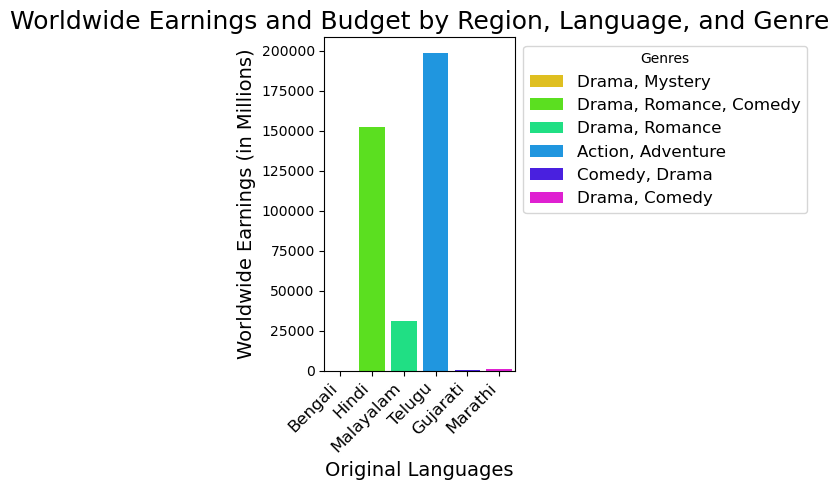

In [25]:
# Group data by Region, Original Languages, and Genre, aggregating Worldwide and Budget
language_region_genre = all_data.groupby(['Region', 'Original Languages', 'Genres']).agg({'Worldwide': 'sum', 'Budget': 'sum'}).reset_index()

# Custom color palette for genres
genre_palette = sns.color_palette("hsv", len(language_region_genre['Genres'].unique()))

plt.figure(figsize=(6, 5))  # Larger figure size for clarity

# Create the barplot with Region, Language, and Genre details
sns.barplot(
    x='Original Languages', 
    y='Worldwide', 
    hue='Genres', 
    data=language_region_genre, 
    palette=genre_palette
)

# Title and labels
plt.title("Worldwide Earnings and Budget by Region, Language, and Genre", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.ylabel("Worldwide Earnings (in Millions)", fontsize=14)
plt.xlabel("Original Languages", fontsize=14)

# Add legend for clarity
plt.legend(title="Genres", loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

This visualization showcases the contribution of various **genres** to worldwide earnings across different **regions** and **original languages**. It highlights genre-specific preferences, regional trends in genre popularity, and the financial impact of genre diversity on the global performance of movies.

  Original Languages                               Dubbed Languages  \
0            Bengali    Telugu, Hindi, Malayalam, Marathi, Gujarati   
1           Gujarati            Telugu, Malayalam, Marathi, Bengali   
2              Hindi  Telugu, Malayalam, Marathi, Gujarati, Bengali   
3          Malayalam      Telugu, Hindi, Marathi, Gujarati, Bengali   
4            Marathi              Telugu, Malayalam, Bengali, Hindi   
5             Telugu   Hindi, Malayalam, Marathi, Gujarati, Bengali   

   India Malayalam Net  India Hindi Net  India Gujarati Net  \
0                0.000            0.000               0.000   
1                0.000            0.000             189.069   
2                0.000        13873.309               0.000   
3             1991.578            0.000               0.000   
4                0.000            0.000               0.000   
5                0.000            0.000               0.000   

   India Marathi Net  India Bengali Net  India Telugu Net  


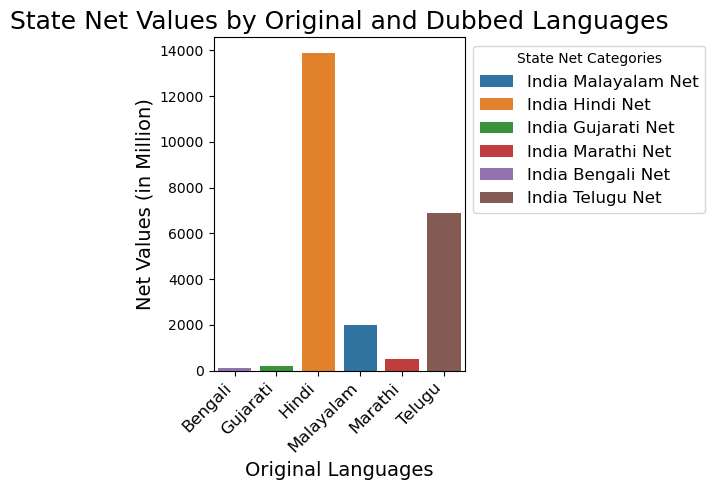

In [27]:
# Select the specific state net columns for analysis
state_net_columns = ["India Malayalam Net", "India Hindi Net", "India Gujarati Net", 
    "India Marathi Net", "India Bengali Net", "India Telugu Net"
    
]

# Group data by Original Languages and Dubbed Languages, aggregating the selected state net values
language_state_net = all_data.groupby(['Original Languages', 'Dubbed Languages'])[state_net_columns].sum().reset_index()

# Display the aggregated result
print(language_state_net)

# Visualization: Plot state net values for Original Languages and Dubbed Languages
plt.figure(figsize=(6,5 ))  # Increase figure size for better visibility

# Iterate through each state net column to plot
for state in state_net_columns:
    sns.barplot(
        x='Original Languages',
        y=state,
        data=language_state_net,
        label=state
    )

# Set plot labels and title
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.title("State Net Values by Original and Dubbed Languages", fontsize=18)
plt.xlabel("Original Languages", fontsize=14)
plt.ylabel("Net Values (in Million)", fontsize=14)

# Add a legend for clarity
plt.legend(title="State Net Categories", loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

Aggregated India Gross Earnings by Movie, Budget, and Industry:
                                                  Movie   Budget   Industry  \
0                                          #Lifestories     1.00  Tollywood   
1                                            100 Crores     1.00  Tollywood   
2                                           102 Not Out    34.00  Bollywood   
3                                         105 Minuttess     1.00  Tollywood   
4                                                  1134     1.00  Tollywood   
5                                             12th Fail     1.00  Tollywood   
6                                           14 (Telugu)     1.00  Tollywood   
7                                              18 Pages    15.00  Tollywood   
8                                              18 Te 72     1.00    Bengali   
9                            1920: Horrors of the Heart     1.00  Tollywood   
10                                                 1921    15.00  B

<Figure size 1600x800 with 0 Axes>

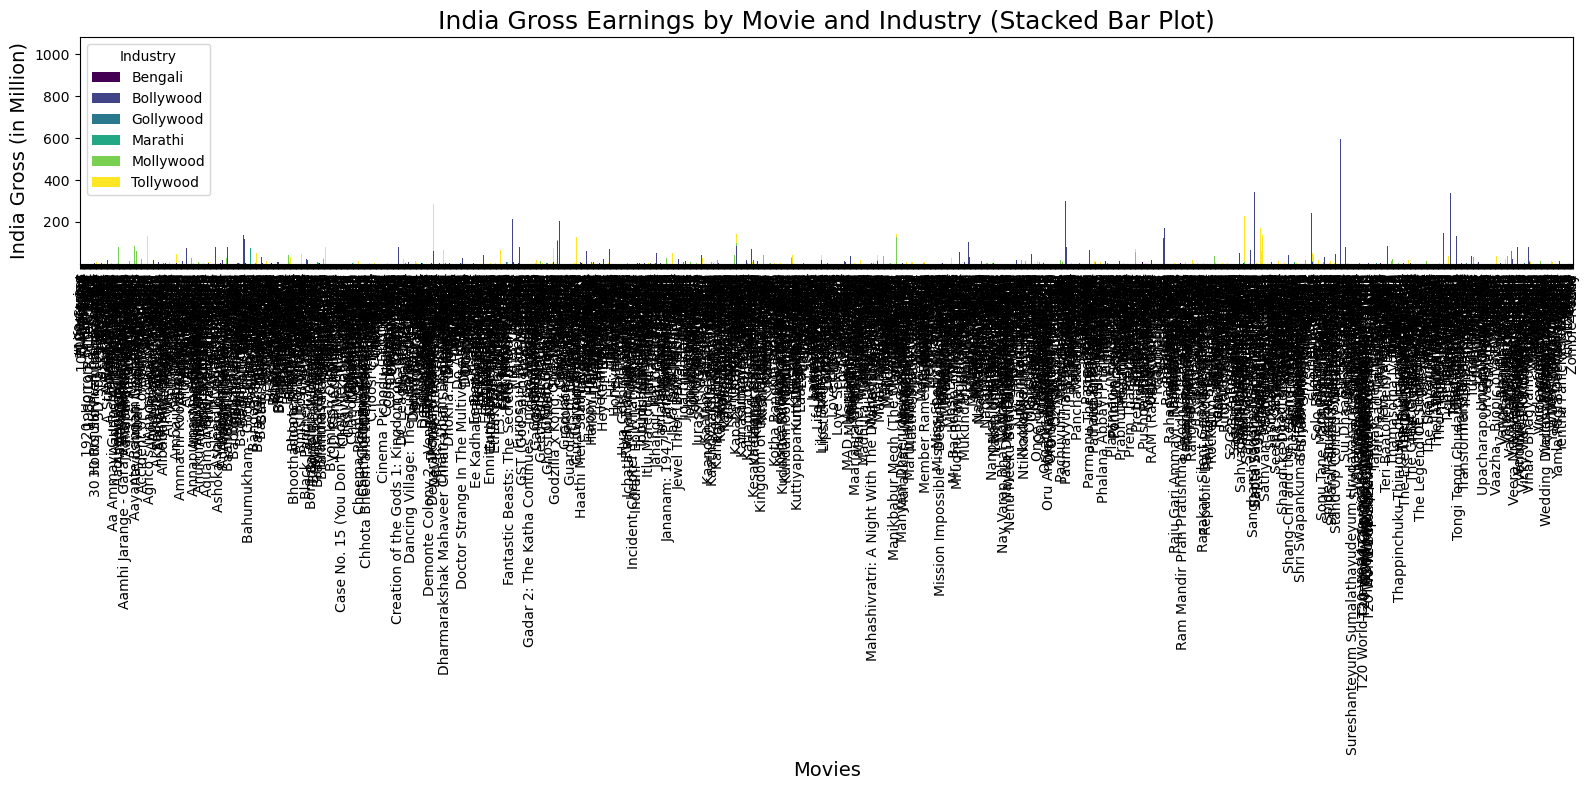

C:\Users\skist\AppData\Local\Temp\ipykernel_18272\772306804.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


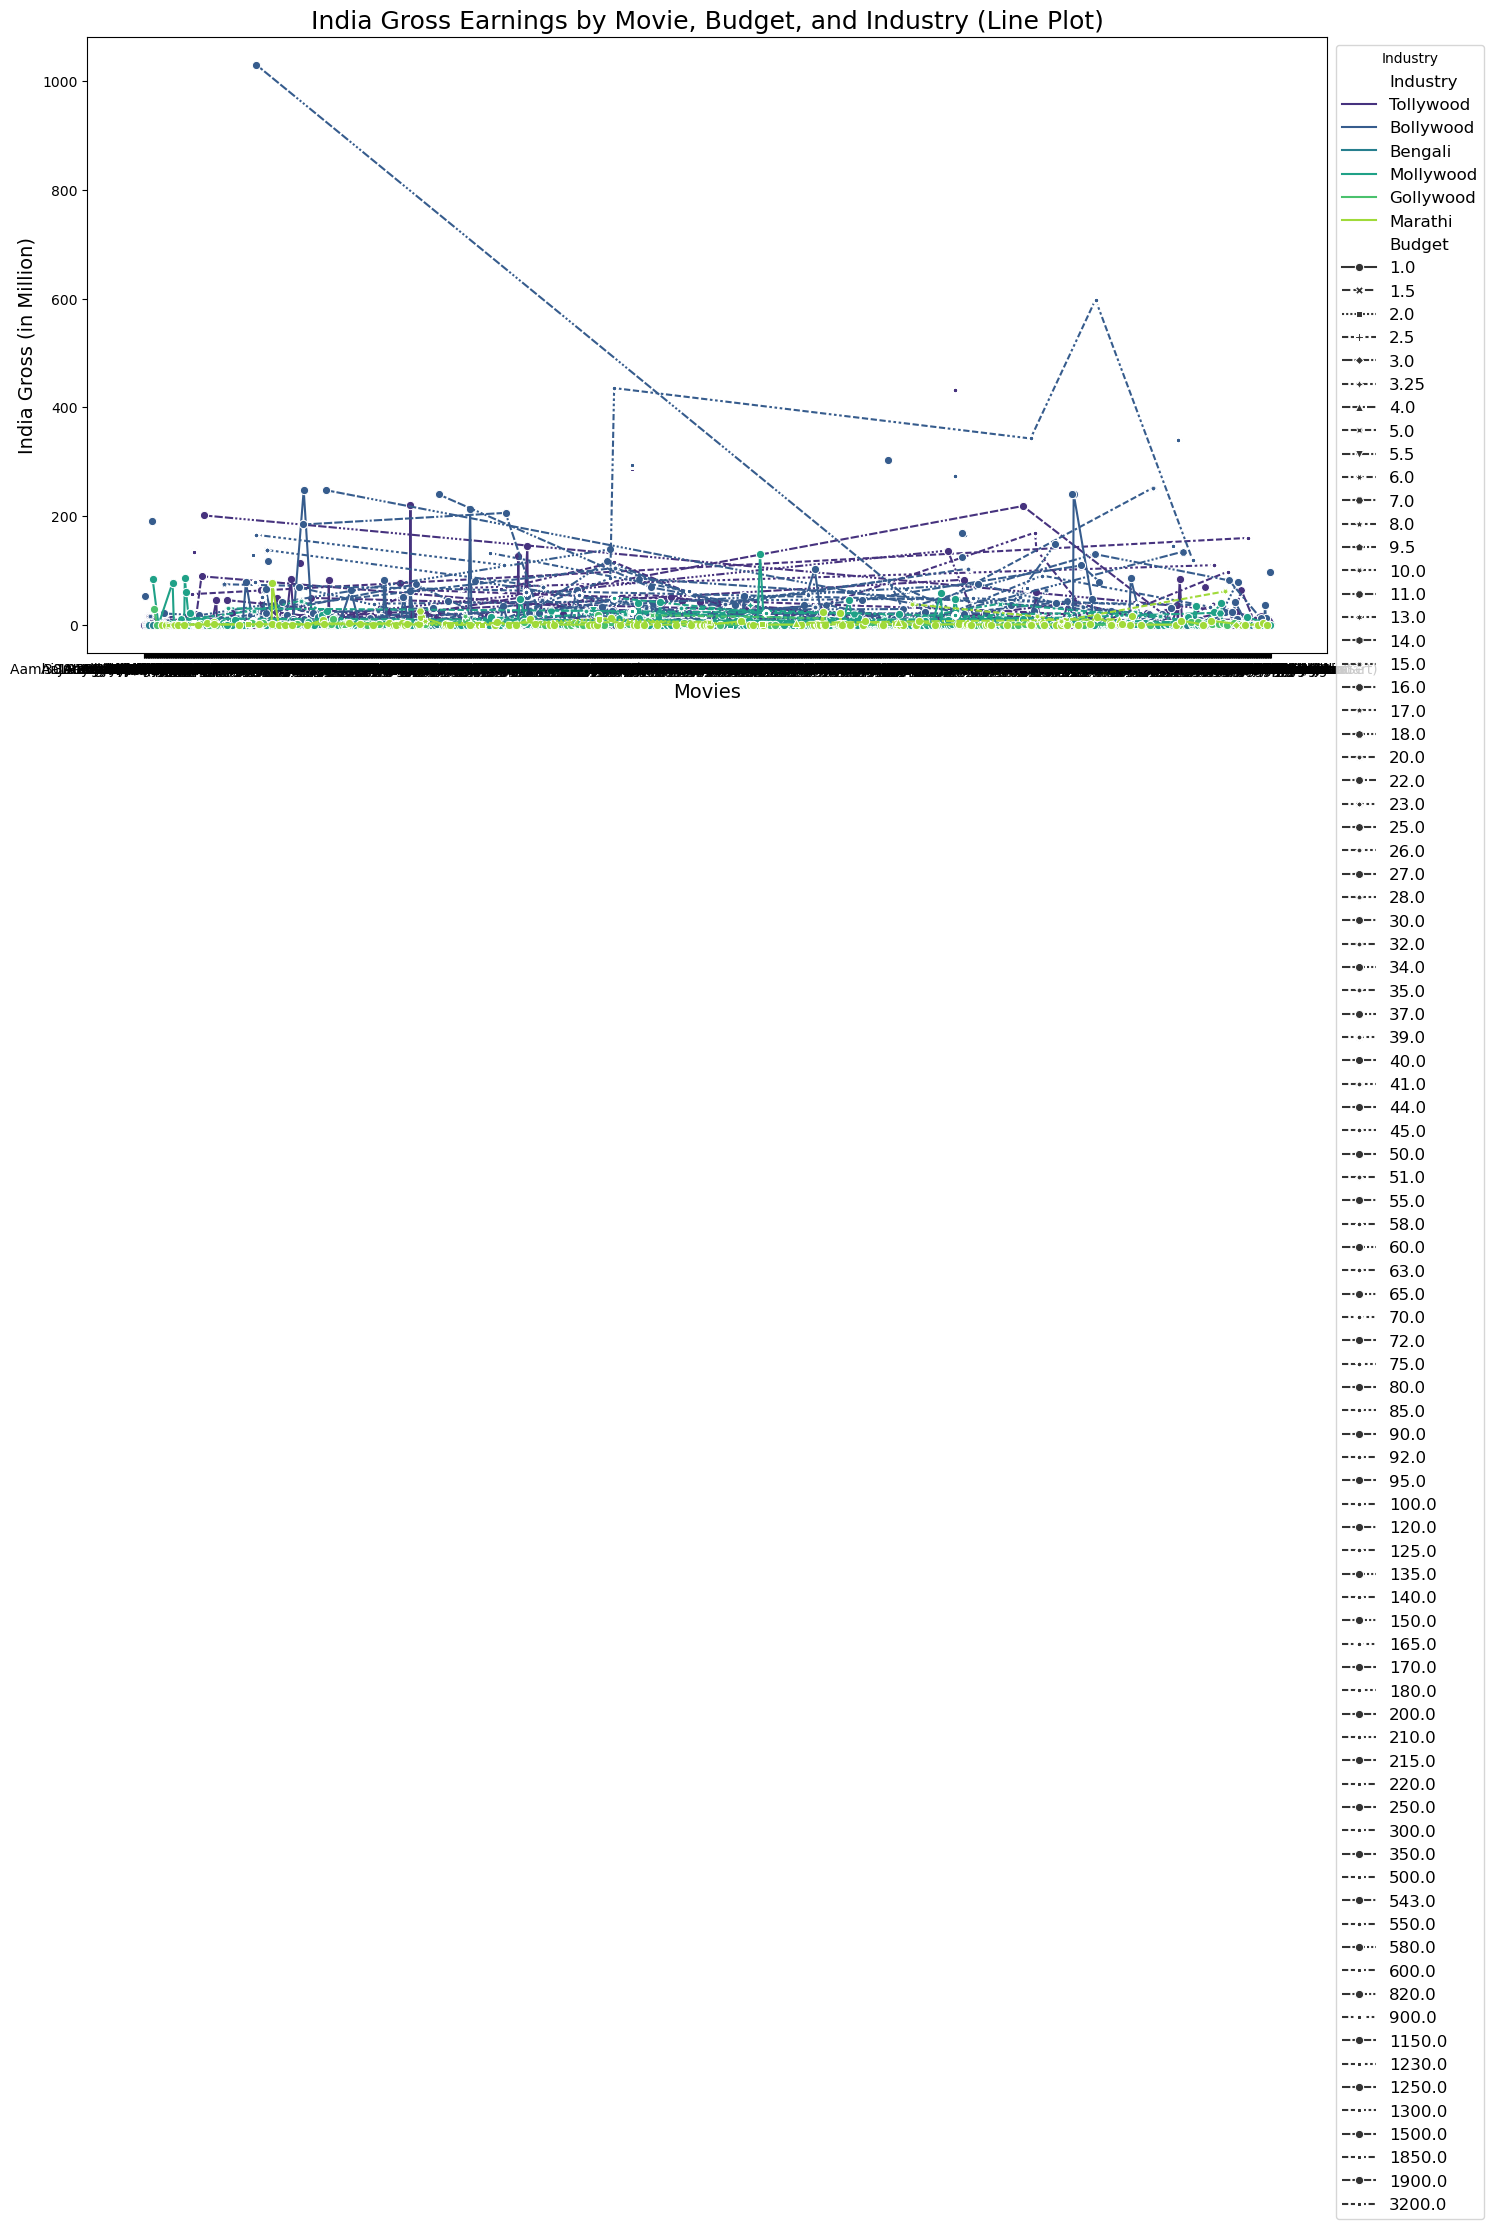

In [477]:
# Assuming `all_data` is the DataFrame containing movie data
# Group data by Movie, Budget, and Industry while aggregating India Gross
movie_budget_gross_industry = all_data.groupby(['Movie', 'Budget', 'Industry']).agg({'India Gross': 'sum'}).reset_index()

# Display the table
print("Aggregated India Gross Earnings by Movie, Budget, and Industry:")
print(movie_budget_gross_industry)

# 1. Stacked Bar Plot
plt.figure(figsize=(16, 8))

# Pivot the data for stacked bar plot
stacked_data = movie_budget_gross_industry.pivot_table(values='India Gross', index='Movie', columns='Industry', aggfunc='sum')

# Create stacked bar plot
stacked_data.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='viridis')

# Title and labels
plt.title("India Gross Earnings by Movie and Industry (Stacked Bar Plot)", fontsize=18)
plt.ylabel("India Gross (in Million)", fontsize=14)
plt.xlabel("Movies", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# 2. Line Plot
plt.figure(figsize=(16, 8))

# Create the line plot with India Gross as the variable, grouped by Budget and Industry
sns.lineplot(x='Movie', y='India Gross', hue='Industry', style='Budget', data=movie_budget_gross_industry, markers=True, palette='viridis')

# Title and labels
plt.title("India Gross Earnings by Movie, Budget, and Industry (Line Plot)", fontsize=18)
plt.ylabel("India Gross (in Million)", fontsize=14)
plt.xlabel("Movies", fontsize=14)

# Add legend for clarity
plt.legend(title="Industry", loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [478]:
stacked_data

Industry                                            Bengali  Bollywood  \
Movie                                                                    
#Lifestories                                            NaN        NaN   
100 Crores                                              NaN        NaN   
102 Not Out                                             NaN     52.150   
105 Minuttess                                           NaN        NaN   
1134                                                    NaN        NaN   
12th Fail                                               NaN        NaN   
14 (Telugu)                                             NaN        NaN   
18 Pages                                                NaN        NaN   
18 Te 72                                             0.0060        NaN   
1920: Horrors of the Heart                              NaN        NaN   
1921                                                    NaN     15.940   
1945                                                    NaN        NaN   
1980 Lo Radhekrishna                                    NaN        NaN   
2.0                                                     NaN    190.480   
2018                                                    NaN        NaN   
21.4                                                 0.0000        NaN   
3 EKKA                                                  NaN        NaN   
3 Storeys                                               NaN      1.850   
30 Hours Survival Gauraiya Live                         NaN      0.050   
30 Rojullo Preminchadam Ela                             NaN        NaN   
302                                                     NaN        NaN   
31st December                                           NaN        NaN   
35 (2024)                                               NaN        NaN   
3D Space Safari (3D)                                    NaN        NaN   
3rd October                                             NaN      0.060   
5 Weddings                                              NaN      1.740   
6 9 5                                                   NaN      1.040   
777 Charlie                                             NaN      7.450   
8 Don 75                                                NaN        NaN   
83                                                      NaN        NaN   
99 Songs                                                NaN        NaN   
A (Ad Infinitum)                                        NaN        NaN   
A Gentleman                                             NaN     20.590   
A Real Encounter                                        NaN      0.030   
A Stranger by the Hill                                  NaN      0.040   
A Valentine's Day                                       NaN        NaN   
A Wedding Story                                         NaN      0.440   
A1 Express                                              NaN        NaN   
AB Aani CD                                              NaN        NaN   
AK47                                                 0.0100        NaN   
Aa Ammayi Gurinchi Meeku Cheppali                       NaN        NaN   
Aa Okkati Adakku                                        NaN        NaN   
Aadavallu Meeku Johaarlu                                NaN        NaN   
Aadesh                                                  NaN      0.000   
Aadikeshava                                             NaN        NaN   
Aadujeevitham - The Goat Life                           NaN      0.530   
Aagantuk                                                NaN        NaN   
Aaha                                                    NaN        NaN   
Aaichya Gavat Marathit Bol                              NaN        NaN   
Aakhir Palaayan Kab Tak                                 NaN      0.580   
Aalkoottathil Oruvan                                    NaN        NaN   
Aalor Disha                                          0.0000        NaN   
Aama

Aggregated Overseas Gross Earnings by Movie, Original Language, Budget, and Industry:
                                                  Movie   Budget   Industry  \
0                                          #Lifestories     1.00  Tollywood   
1                                            100 Crores     1.00  Tollywood   
2                                           102 Not Out    34.00  Bollywood   
3                                         105 Minuttess     1.00  Tollywood   
4                                                  1134     1.00  Tollywood   
5                                             12th Fail     1.00  Tollywood   
6                                           14 (Telugu)     1.00  Tollywood   
7                                              18 Pages    15.00  Tollywood   
8                                              18 Te 72     1.00    Bengali   
9                            1920: Horrors of the Heart     1.00  Tollywood   
10                                           

<Figure size 1600x800 with 0 Axes>

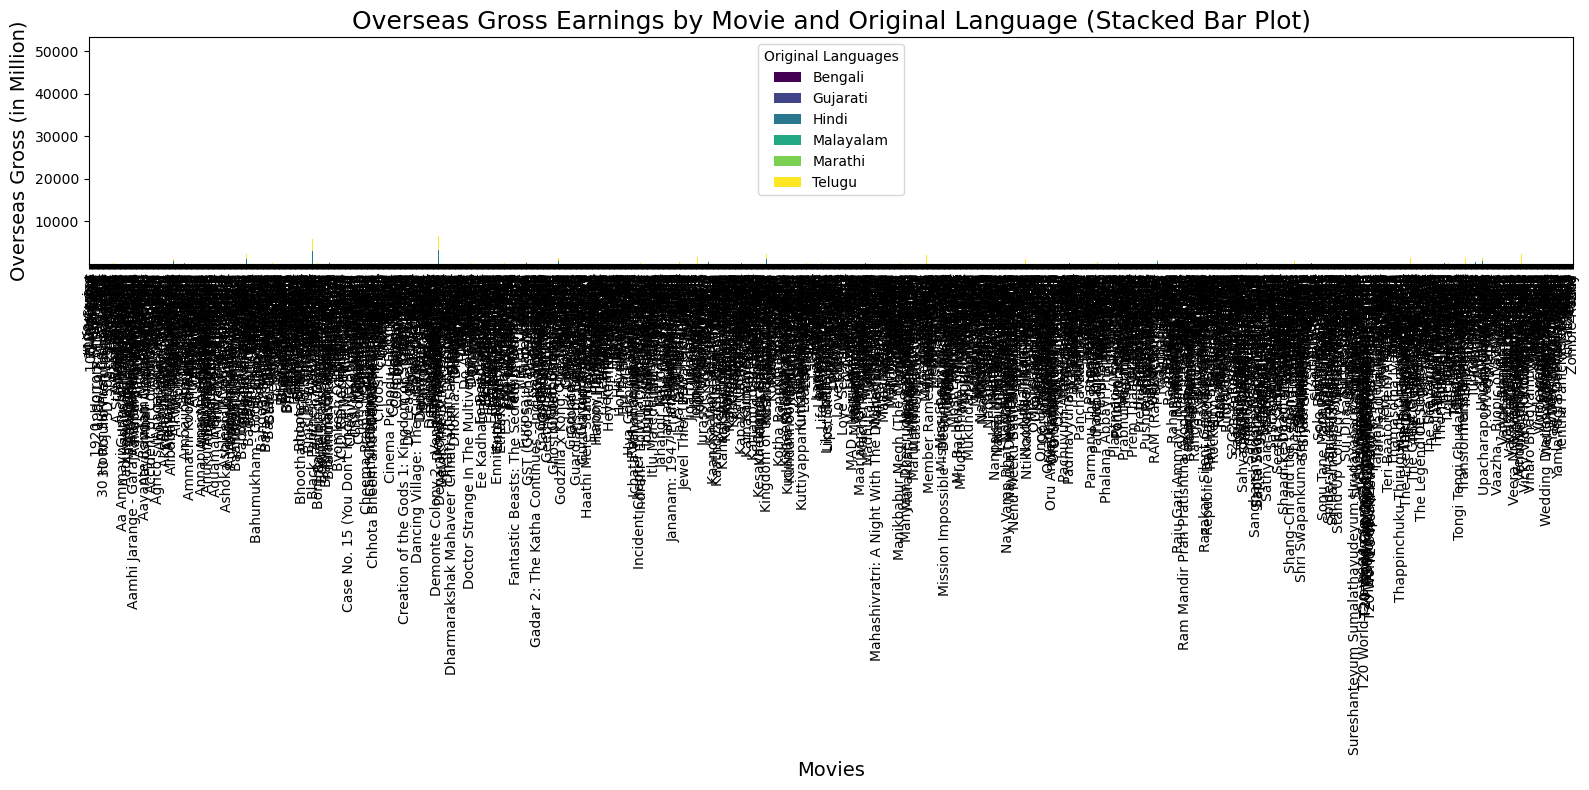

C:\Users\skist\AppData\Local\Temp\ipykernel_18272\1009162558.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


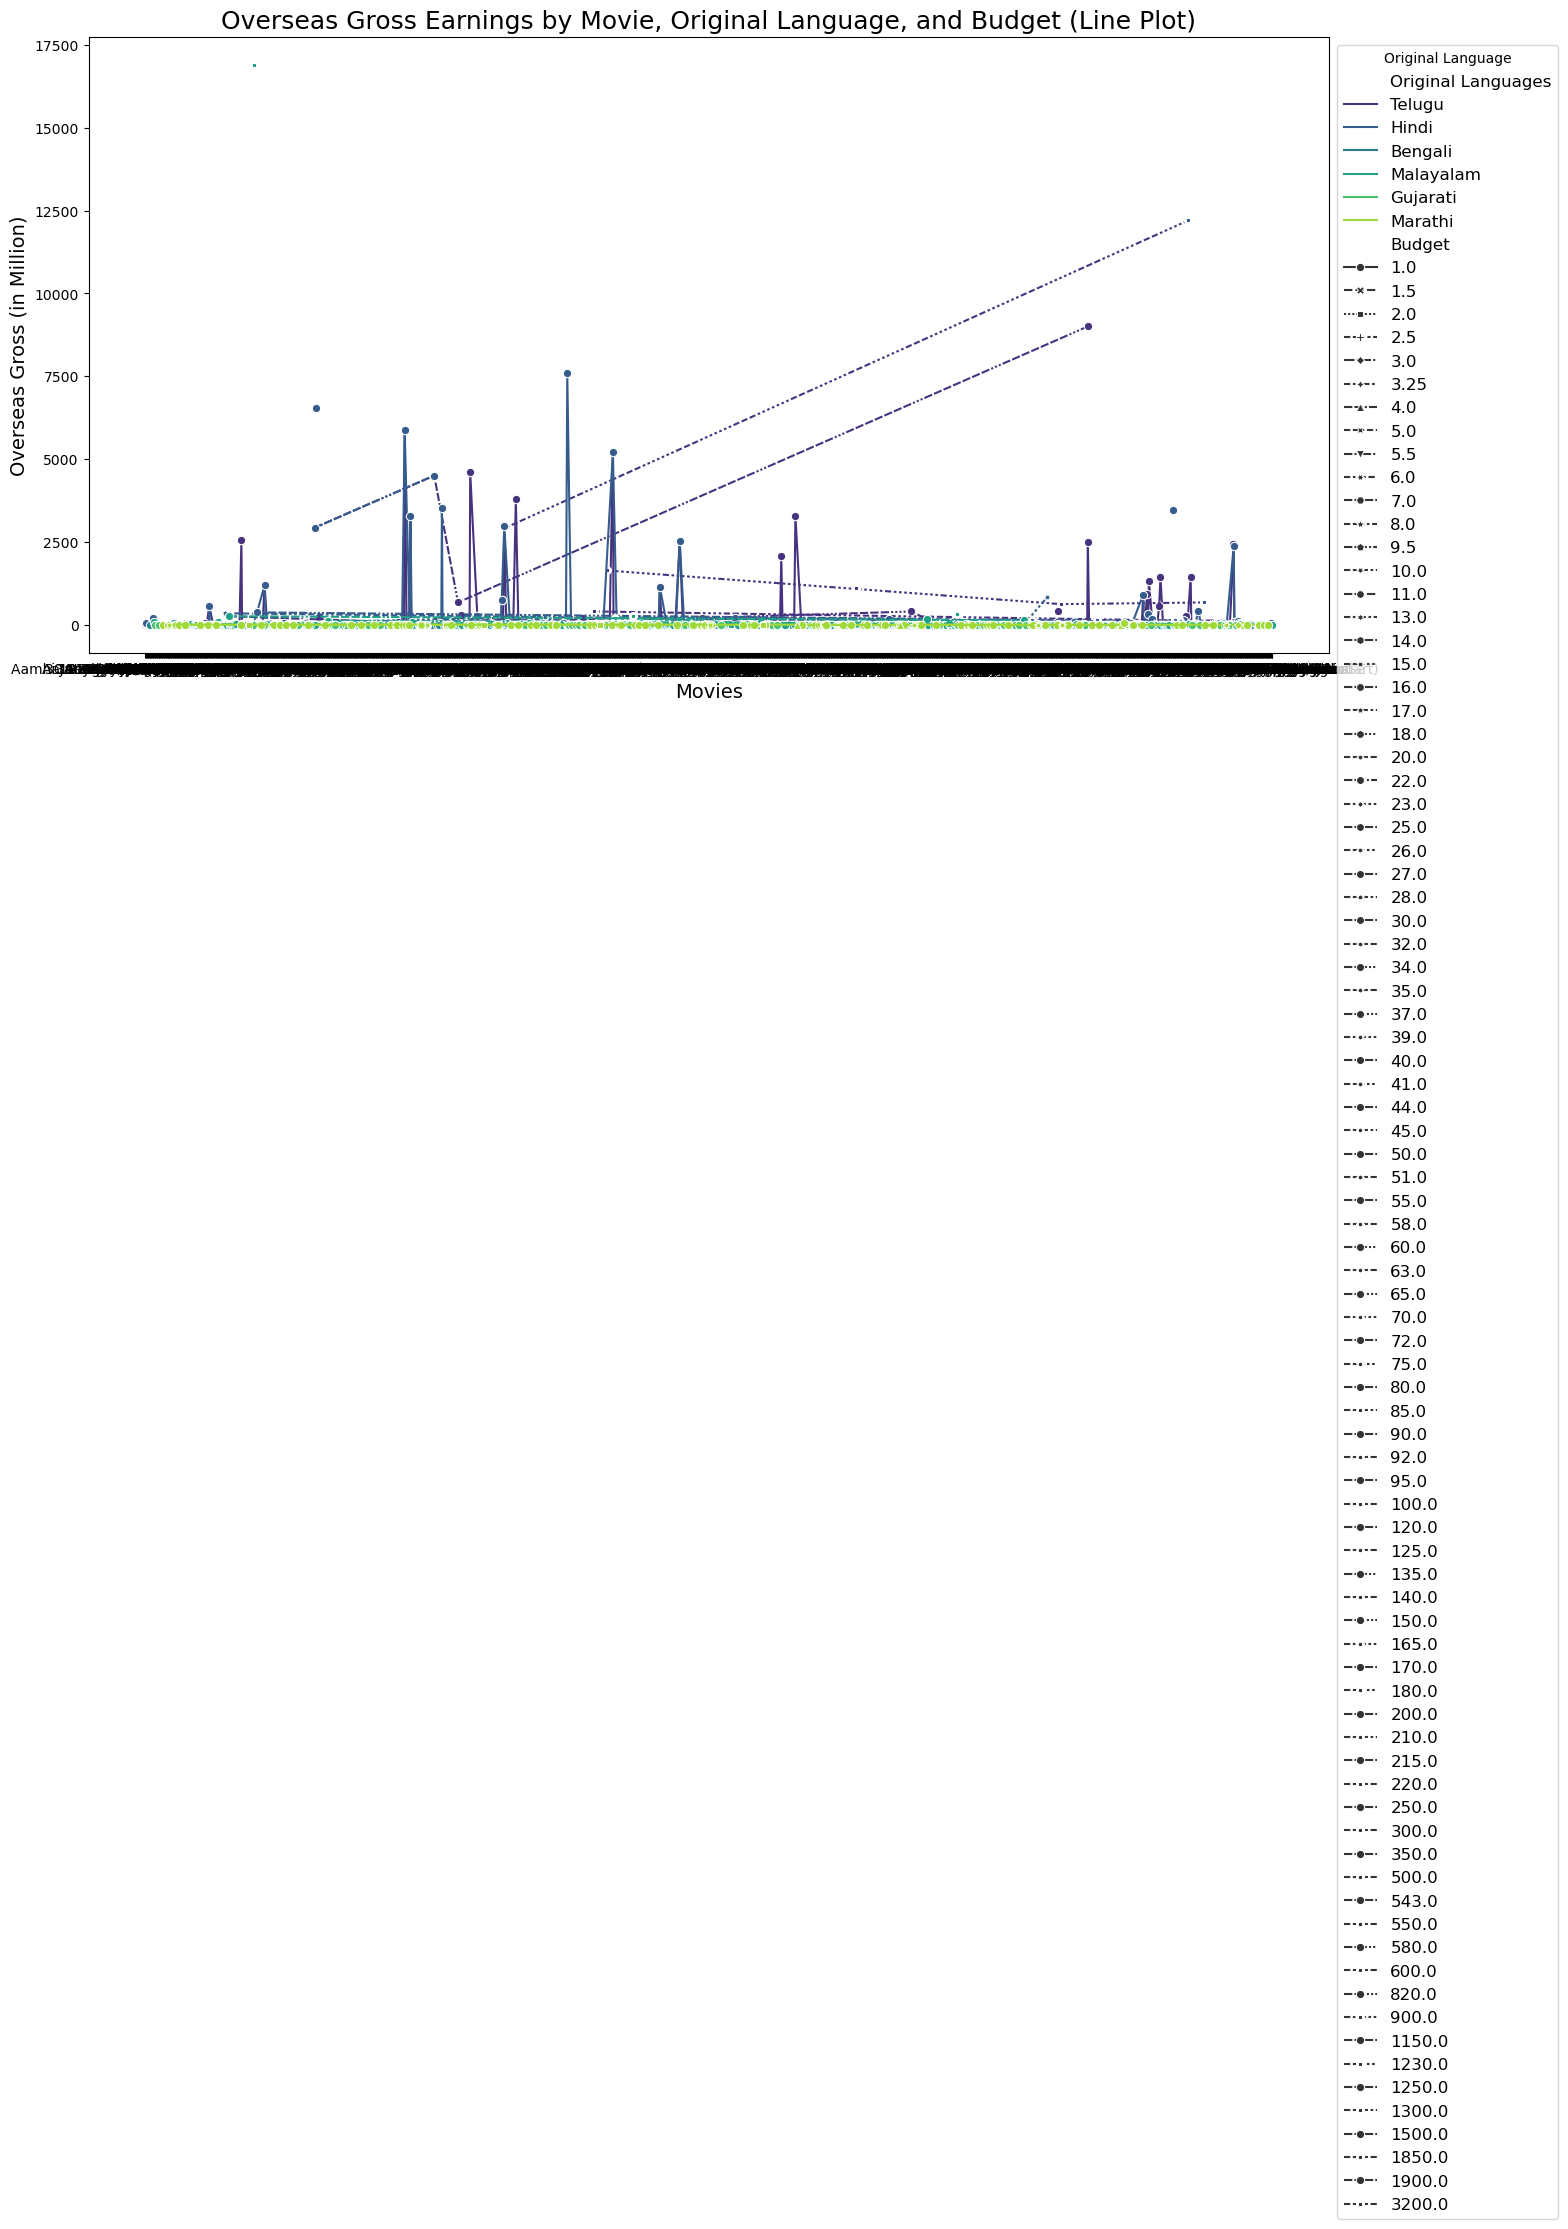

In [486]:
# Assuming `all_data` is the DataFrame containing movie data
# Group data by Movie, Budget, Industry, and Original Language while aggregating Overseas Gross
movie_language_gross_industry = all_data.groupby(['Movie', 'Budget', 'Industry', 'Original Languages']).agg({'Overseas': 'sum'}).reset_index()

# Display the table of aggregated Overseas Gross earnings
print("Aggregated Overseas Gross Earnings by Movie, Original Language, Budget, and Industry:")
print(movie_language_gross_industry)

# 1. Stacked Bar Plot (Overseas Earnings by Movie and Original Language)
plt.figure(figsize=(16, 8))

# Pivot the data for stacked bar plot
stacked_data = movie_language_gross_industry.pivot_table(values='Overseas', index='Movie', columns='Original Languages', aggfunc='sum')

# Create stacked bar plot
stacked_data.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='viridis')

# Title and labels
plt.title("Overseas Gross Earnings by Movie and Original Language (Stacked Bar Plot)", fontsize=18)
plt.ylabel("Overseas Gross (in Million)", fontsize=14)
plt.xlabel("Movies", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# 2. Line Plot (Overseas Earnings by Movie and Original Language)
plt.figure(figsize=(16, 8))

# Create the line plot with Overseas Gross as the variable, grouped by Original Language and Budget
sns.lineplot(x='Movie', y='Overseas', hue='Original Languages', style='Budget', data=movie_language_gross_industry, markers=True, palette='viridis')

# Title and labels
plt.title("Overseas Gross Earnings by Movie, Original Language, and Budget (Line Plot)", fontsize=18)
plt.ylabel("Overseas Gross (in Million)", fontsize=14)
plt.xlabel("Movies", fontsize=14)

# Add legend for clarity
plt.legend(title="Original Language", loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\skist\AppData\Local\Temp\ipykernel_18272\2925990160.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Movie', y='Dubbed Languages', data=all_data, palette='viridis', s=100)


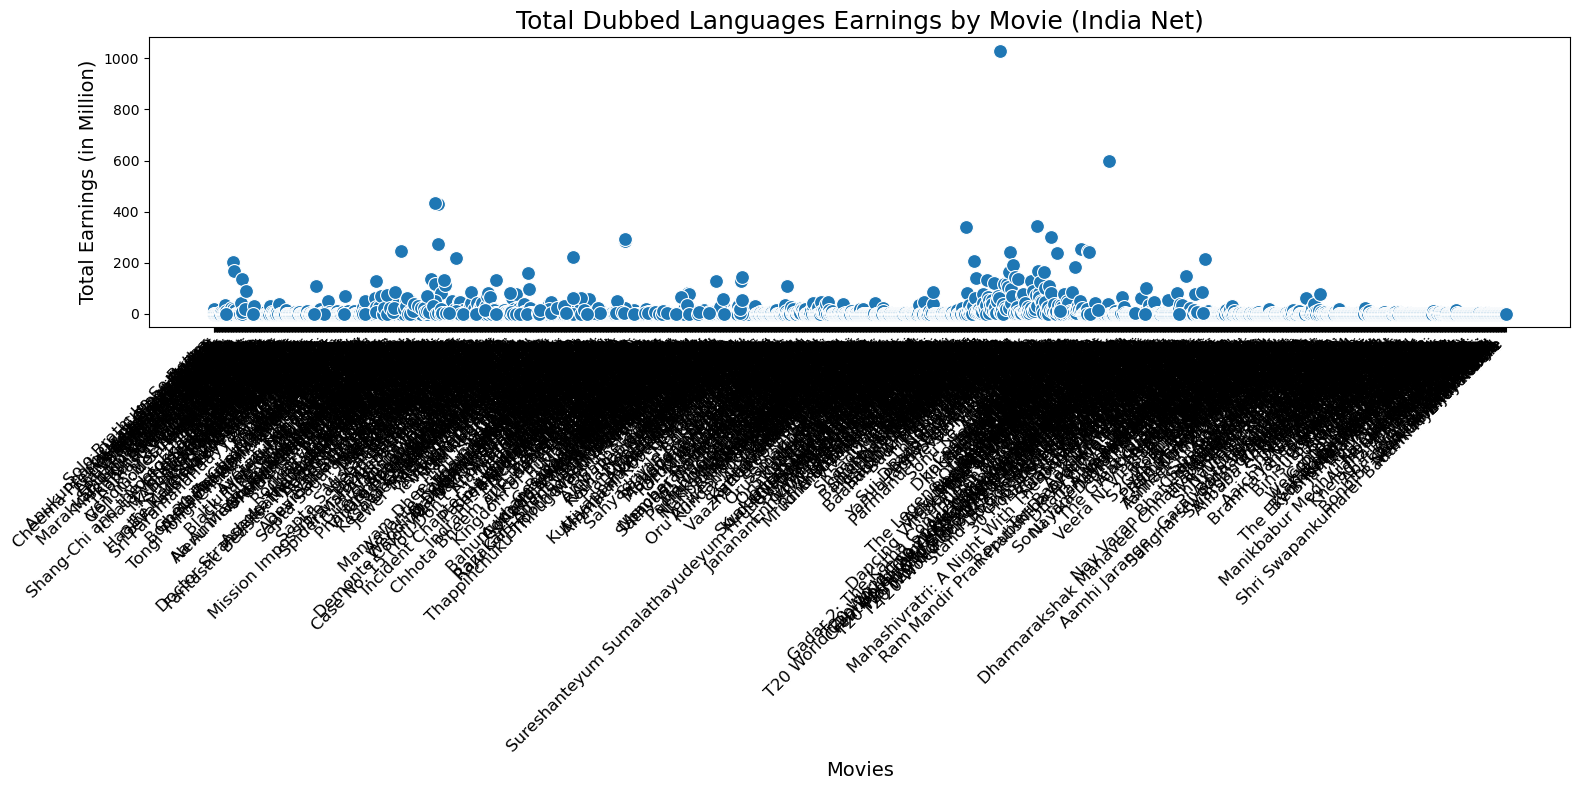

In [492]:
# Plotting: Dubbed Languages Earnings by Movie using a scatter plot
plt.figure(figsize=(16, 8))

# Create the scatter plot
sns.scatterplot(x='Movie', y='Dubbed Languages', data=all_data, palette='viridis', s=100)

# Title and labels
plt.title("Total Dubbed Languages Earnings by Movie (India Net)", fontsize=18)
plt.ylabel("Total Earnings (in Million)", fontsize=14)
plt.xlabel("Movies", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [493]:
# Display the table of aggregated dubbed languages earnings by movie
print("Aggregated Dubbed Languages Earnings by Movie:")
all_data[['Movie', 'Dubbed Languages']]

Aggregated Dubbed Languages Earnings by Movie:


Movie  Dubbed Languages
0                               Solo Brathuke So Better           18.1000
1                                                 Madha            0.3500
2                                                Arjuna            0.2500
3                                                   302            0.0500
4                                                Shivan            0.2000
5                                                Eureka            0.2500
6                                         College Kumar            0.1600
7                                           Palasa 1978            2.5000
8                                         O Pitta Katha            0.7700
9                        Anukunnadi Okati Ayindi Okkati            0.0900
10                                                  HIT            6.6000
11                                                Raahu            0.5000
12                                              Valayam            3.7000
13                                      Pressure Cooker            0.5000
14                         Cheema Prema Madhyalo Bhaama            0.5500
15                                             Bheeshma           35.6000
16                                   Oka Chinna Viramam            1.1000
17                                   World Famous Lover           11.5000
18                                Life Anubavinchu Raja            0.5500
19                                                Jaanu            8.1000
20                                     Neevalle Nenunna            0.4500
21                                       Degree College            0.4500
22                                   Choosi Choodangane            2.8000
23                                           Disco Raja           21.0000
24                                     Street Dancer 3D            0.1400
25                                             Dolittle            0.1300
26                               Entha Manchivaadavuraa           19.1000
27                              Ala Vaikunthapurramuloo          200.9800
28                                  Sarileru Neekevvaru          169.5500
29                                               Darbar           13.4700
30                                               Wife,i            0.0900
31                                               Uttara            0.1300
32                                      Namaste Nestama            0.5800
33                                              Hulchul            0.0800
34                                    Oollalla Oollalla            1.9600
35                                            Beautiful            1.1800
36                                      Arjuna Phalguna            0.0000
37                                     Shyam Singha Roy           42.8300
38                                                   83            0.3600
39                            Pushpa: The Rise (Part 1)          136.4300
40                              Spider-Man: No Way Home            2.2200
41                                              Lakshya            0.0000
42                                               Skylab            2.0100
43                    Marakkar: Lion of the Arabian Sea            0.2200
44                                              Akhanda           89.0000
45                                    Anubhavinchu Raja            2.6700
46                                      Chalo Premiddam            0.0250
47                                           Mr. Lonely            0.0030
48                          Missing - Search vs Revenge            0.3600
49                                         Street Light            0.1000
50                                         Ravana Lanka            0.0600
51                                             Ram Asur            0.1900
52                                               Poster            0.1200
53                              Ghostbusters: Afterlif

C:\Users\skist\AppData\Local\Temp\ipykernel_9800\3479438457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


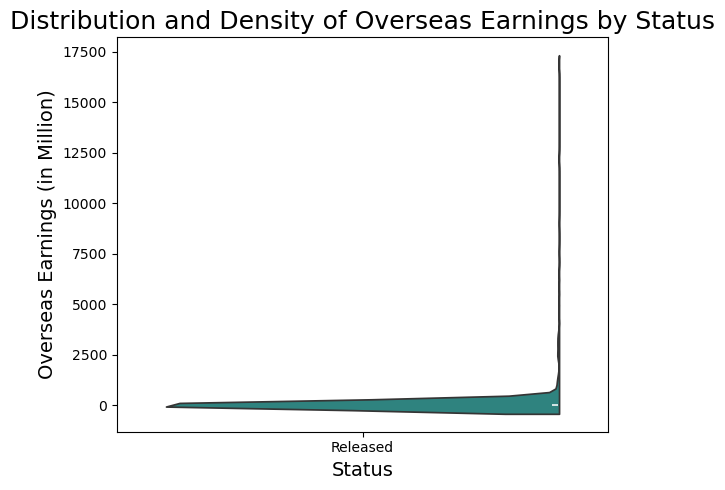

In [31]:
movies_languages_status = all_data.groupby(['Movie', 'Dubbed Languages', 'India Gross', 'Status']).agg({'Overseas': 'sum'}).reset_index()
# Violin Plot
plt.figure(figsize=(6, 5))

sns.violinplot(
    x='Status',
    y='Overseas',
    data=movies_languages_status,
    palette='viridis',
    split=True
)

# Title and labels
plt.title("Distribution and Density of Overseas Earnings by Status", fontsize=18)
plt.ylabel("Overseas Earnings (in Million)", fontsize=14)
plt.xlabel("Status", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

Minimum values for each column:
India Malayalam Net    0.0
India Hindi Net        0.0
India Gujarati Net     0.0
India Marathi Net      0.0
India Bengali Net      0.0
India Telugu Net       0.0
Budget                 1.0
Overseas               0.0
Worldwide              0.0
India Gross            0.0
dtype: float64

Maximum values for each column:
India Malayalam Net      130.25
India Hindi Net         1030.42
India Gujarati Net        28.93
India Marathi Net         76.28
India Bengali Net         13.40
India Telugu Net         431.01
Budget                  3200.00
Overseas               16902.50
Worldwide              17380.00
India Gross             1030.42
dtype: float64


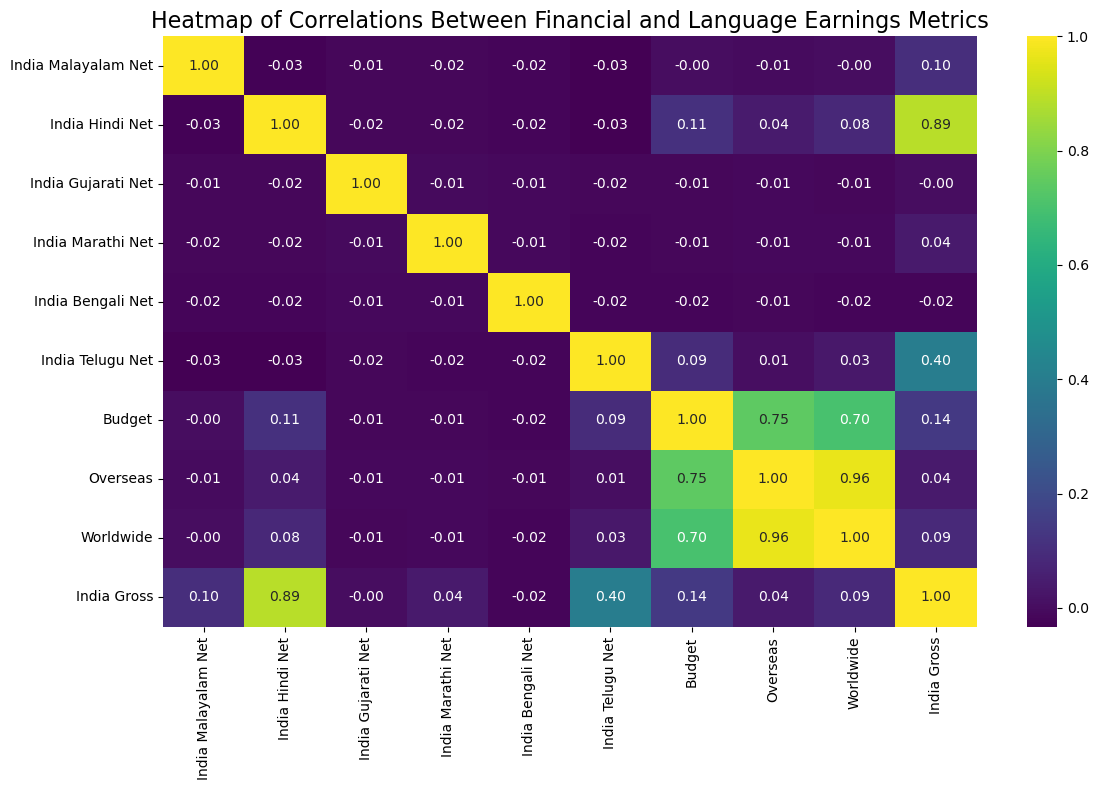

In [498]:
# Select the relevant columns for analysis
heatmap_data = all_data[[
    "India Malayalam Net", "India Hindi Net", "India Gujarati Net",
    "India Marathi Net", "India Bengali Net", "India Telugu Net",
    "Budget", "Overseas", "Worldwide", "India Gross"
]]

# Calculate min and max for each column
min_values = heatmap_data.min()
max_values = heatmap_data.max()

print("Minimum values for each column:")
print(min_values)
print("\nMaximum values for each column:")
print(max_values)

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data.corr(),  # Compute correlation matrix
    annot=True,           # Show correlation values
    cmap='viridis',       # Choose color map
    fmt=".2f"             # Format correlation values
)

# Title for the heatmap
plt.title("Heatmap of Correlations Between Financial and Language Earnings Metrics", fontsize=16)

# Display the heatmap
plt.tight_layout()
plt.show()


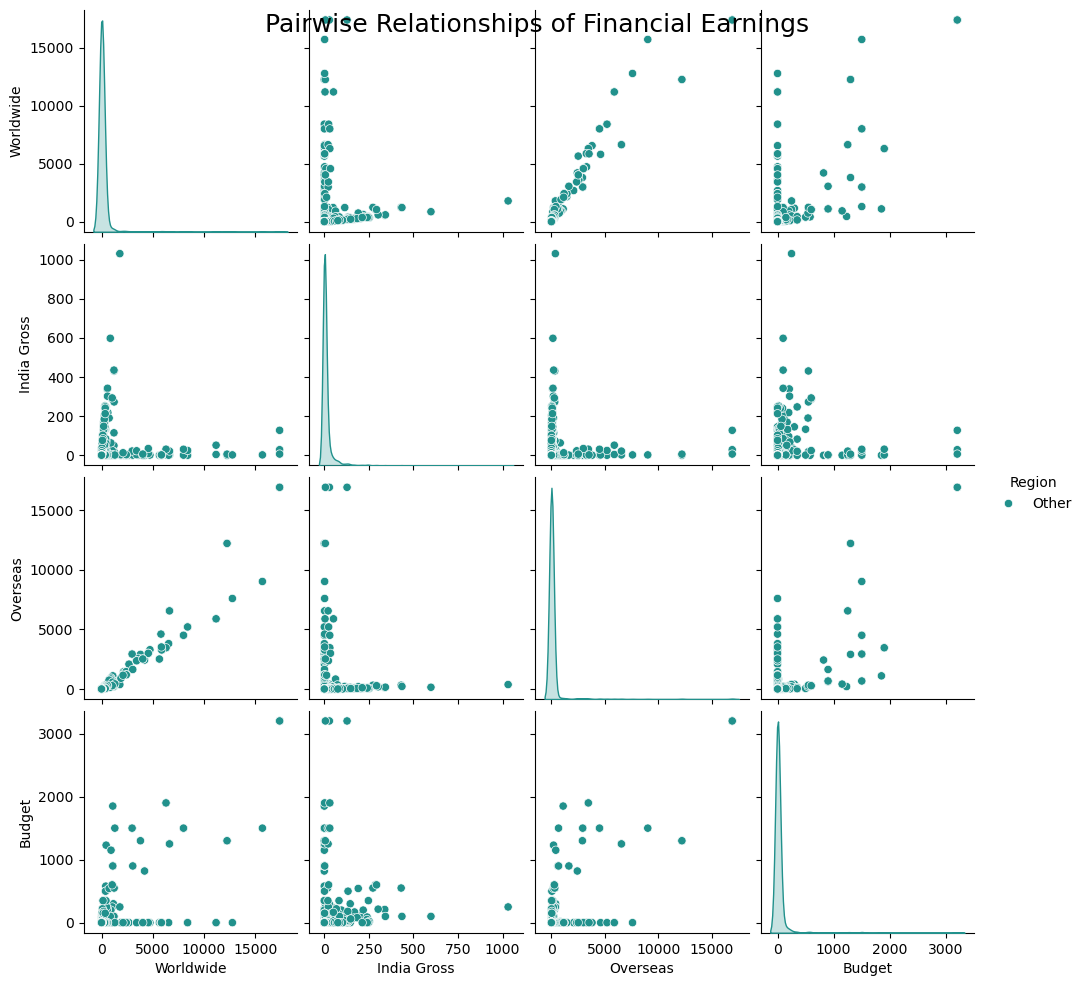

In [506]:
# Ensure the 'Region' column is part of the dataset
financial_data = all_data[['Worldwide', 'India Gross', 'Overseas', 'Budget', 'Region']]

# Generate pairplot
sns.pairplot(financial_data, hue='Region', palette='viridis')

# Title
plt.suptitle("Pairwise Relationships of Financial Earnings", fontsize=18)
plt.show()

This code generates a **pairplot** to examine the relationships between financial metrics (`Worldwide`, `India Gross`, `Overseas`, `Budget`) in the dataset. The `hue='Region'` parameter distinguishes data points by region using the `viridis` color palette. A title is included to provide context, making the visual analysis more intuitive and informative.

C:\Users\skist\AppData\Local\Temp\ipykernel_18272\1085656336.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Industry', y='Worldwide', data=all_data, palette='viridis')


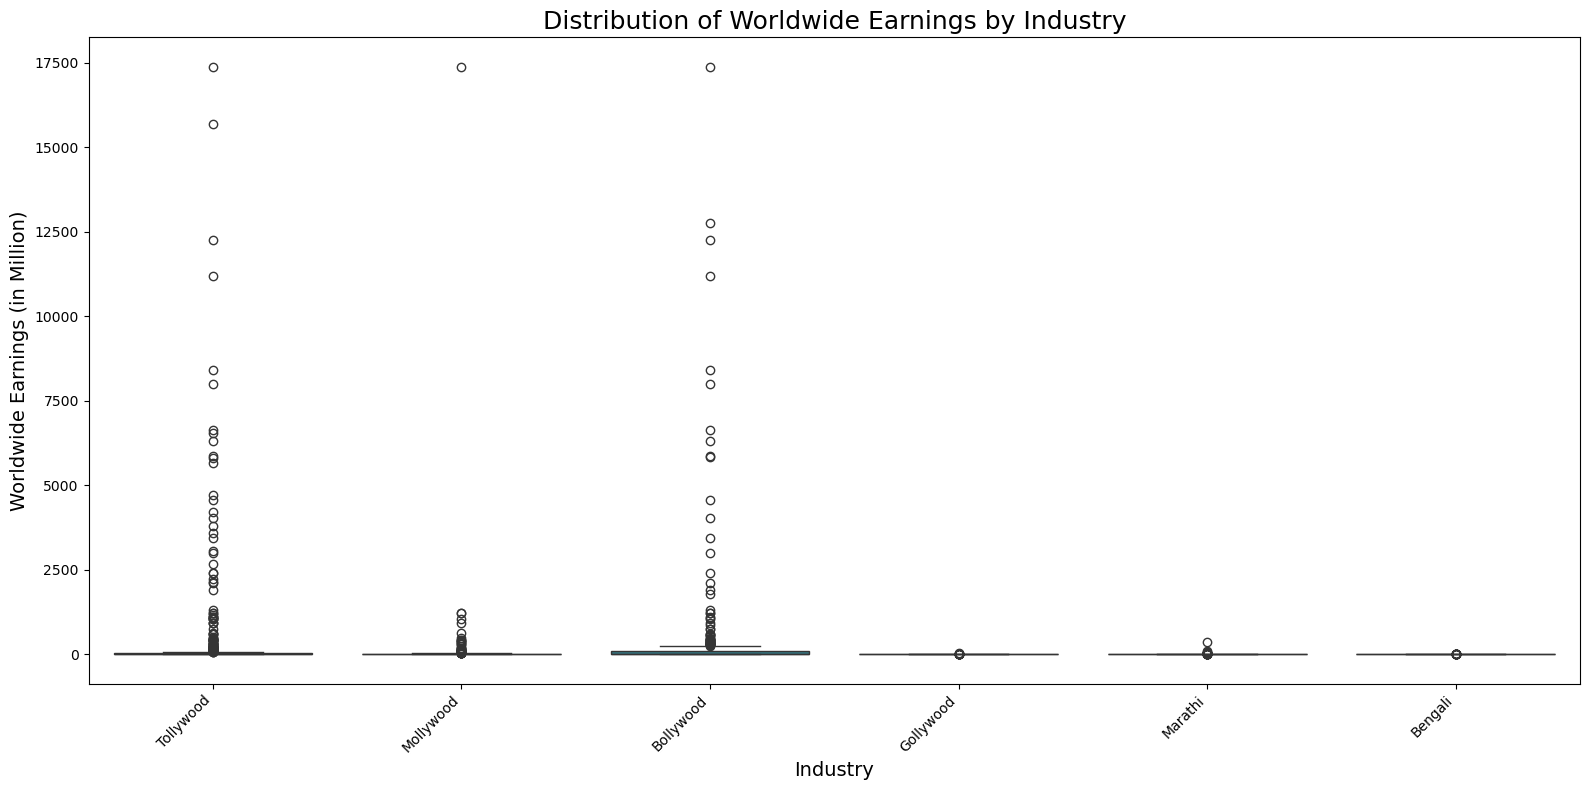

In [507]:
# Boxplot to compare earnings by Industry
plt.figure(figsize=(16, 8))

# Worldwide Earnings
sns.boxplot(x='Industry', y='Worldwide', data=all_data, palette='viridis')
plt.title("Distribution of Worldwide Earnings by Industry", fontsize=18)
plt.xlabel("Industry", fontsize=14)
plt.ylabel("Worldwide Earnings (in Million)", fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This code generates a **boxplot** to display the distribution of worldwide earnings across various industries. The `Industry` column is plotted on the categorical axis (`x`), and `Worldwide` earnings appear on the numerical axis (`y`). A title and axis labels improve clarity, while rotated x-axis labels accommodate longer names. The `viridis` palette enhances visual aesthetics.

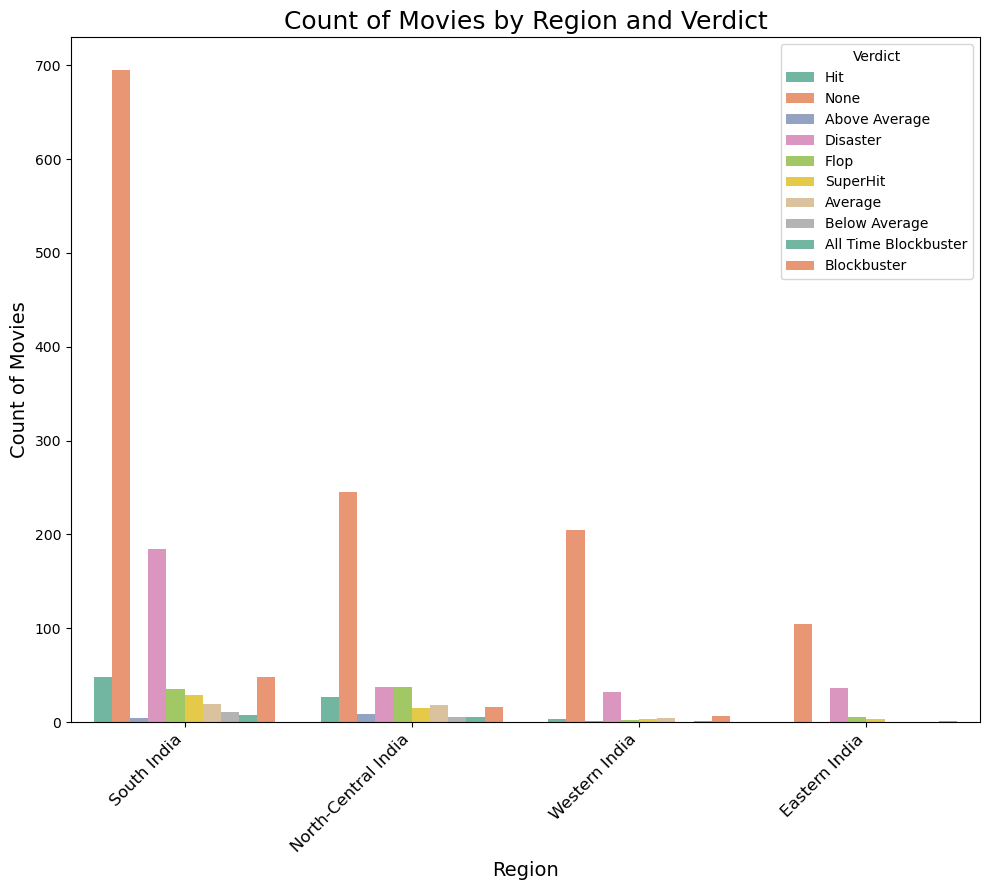

In [38]:
# Map industries to regions
all_data['Region'] = all_data['Industry'].map({
    'Bollywood': 'North-Central India',
    'Tollywood': 'South India',
    'Mollywood': 'South India',
    'Gollywood': 'Western India',
    'Marathi': 'Western India',
    'Bengali': 'Eastern India',
})

# Countplot to visualize the number of movies by Region and Verdict
plt.figure(figsize=(10, 9))
sns.countplot(x='Region', hue='Verdict', data=all_data, palette='Set2')

# Title and labels
plt.title("Count of Movies by Region and Verdict", fontsize=18)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Count of Movies", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout for tight spacing
plt.tight_layout()
plt.show()

In [512]:
# Display a table of moie counts by Region and Verdict, including Movie names
movie_counts = all_data.groupby(['Region', 'Verdict']).agg(
    Movie_Count=('Movie', 'count'),
    Movies=('Movie', list)
).reset_index()
movie_counts

Region               Verdict  Movie_Count  \
0         Eastern India           Blockbuster            1   
1         Eastern India              Disaster           36   
2         Eastern India                  Flop            6   
3         Eastern India                  None          105   
4         Eastern India              SuperHit            3   
5   North-Central India         Above Average            9   
6   North-Central India  All Time Blockbuster            5   
7   North-Central India               Average           18   
8   North-Central India         Below Average            5   
9   North-Central India           Blockbuster           16   
10  North-Central India              Disaster           37   
11  North-Central India                  Flop           37   
12  North-Central India                   Hit           27   
13  North-Central India                  None          245   
14  North-Central India              SuperHit           15   
15          South India         Above Average            4   
16          South India  All Time Blockbuster            8   
17          South India               Average           19   
18          South India         Below Average           11   
19          South India           Blockbuster           48   
20          South India              Disaster          185   
21          South India                  Flop           35   
22          South India                   Hit           48   
23          South India                  None          694   
24          South India              SuperHit           29   
25        Western India         Above Average            1   
26        Western India  All Time Blockbuster            1   
27        Western India               Average            4   
28        Western India           Blockbuster            7   
29        Western India              Disaster           32   
30        Western India                  Flop            2   
31        Western India                   Hit            3   
32        Western India                  None          205   
33        Western India              SuperHit            3   

                                               Movies  
0                           [Karnasubarner Guptodhon]  
1   [Nirbhaya, Olpo Holeo Sotti, Kanta Tarer Bera,...  
2   [Prem Tame, Magic, Somay, Tumi Ashbe Bole, Beg...  
3   [SOS Kolkata, Dracula Sir, The Parcel, Brahma ...  
4   [Projapati, Belashuru, The Eken, Ruddhaswas Ra...  
5   [Naam Shabana, Pihu, Mulk, Soorma, Blackmail, ...  
6   [Baahubali 2  The Conclusion, Sanju, KGF Chapt...  
7   [Qarib Qarib Singlle, Ittefaq, Newton, Babumos...  
8   [Shaadi Mein Zaroor Aana, Baazaar, Ram Setu, V...  
9   [Tiger Zinda Hai, Golmaal Again, Simmba, K.G.F...  
10  [Monsoon Shootout, Tera Intezaar, Ribbon, Chef...  
11  [Firangi, Aksar 2, Poster Boys, Baadshaho, Mub...  
12  [Tumhari Sulu, Shubh Mangal Saavdhan, Bareilly...  
13  [Simran, Lucknow Central, Daddy, Partition: 19...  
14  [Fukrey Returns, Secret Superstar, Judwaa 2, T...  
15               [HIT, Prince, Naane Varuvean, Beast]  
16  [Ala Vaikunthapurramuloo, Ponniyin Selvan - Pa...  
17  [Choosi Choodangane, Shyam Singha Roy, Vakeel ...  
18  [Street Dancer 3D, Darbar, Annaatthe, Thimmaru...  
19  [Sarileru Neekevvaru, Doctor, Raja Raja Chora,...  
20  [Raahu, Pressure Cooker, Cheema Prema Madhyalo...  
21  [Valayam, Oka Chinna Viramam, Paagal, Ishq - N...  
22  [Solo Brathuke So Better, Entha Manchivaadavur...  
23  [Madha, Arjuna, 302, Shivan, Eureka, College K...  
24  [Bheeshma, Pushpa: The Rise (Part 1), Spider-M...  
25                                        [Thackeray]  
26                                [Baipan Bhari Deva]  
27  [Kasoombo, Lagan Special, Mogra Phulaalaa, She...  
28  [Fakt Mahilao Maate, Kehvatlal Parivar, 3 EKKA...  
29  [Amar Prem, Jivan Aakhyaan, Dham Dham Dhammach...  
30         [Tari Yaad Ma Jindagi Javani, Oh My Ghost]  
31   [Bushirt T-shirt, Sarsenapati Hambirrao, Vaalvi] 

The code maps movie industries to regions and creates a countplot to show the distribution of movies by region and verdict, with colors representing different verdicts. It also generates a table using `groupby()` to display the count of movies and lists the movie names for each region and verdict combination.

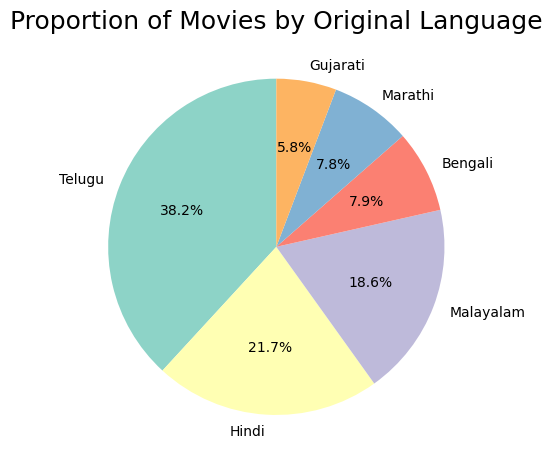

In [28]:
# Pie chart for Original Languages distribution
language_counts = all_data['Original Languages'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(language_counts)))

# Title
plt.title("Proportion of Movies by Original Language", fontsize=18)

plt.tight_layout()
plt.show()

This code creates a **pie chart** to display the distribution of movies across different **Original Languages**. It computes the count of each language using `value_counts()`. The chart is generated with `plt.pie()`, showing the percentage of each language. Colors are selected from the `Set3` palette, and the chart includes a title for clarity. The `tight_layout()` function is used to ensure the plot is properly fitted within the figure.

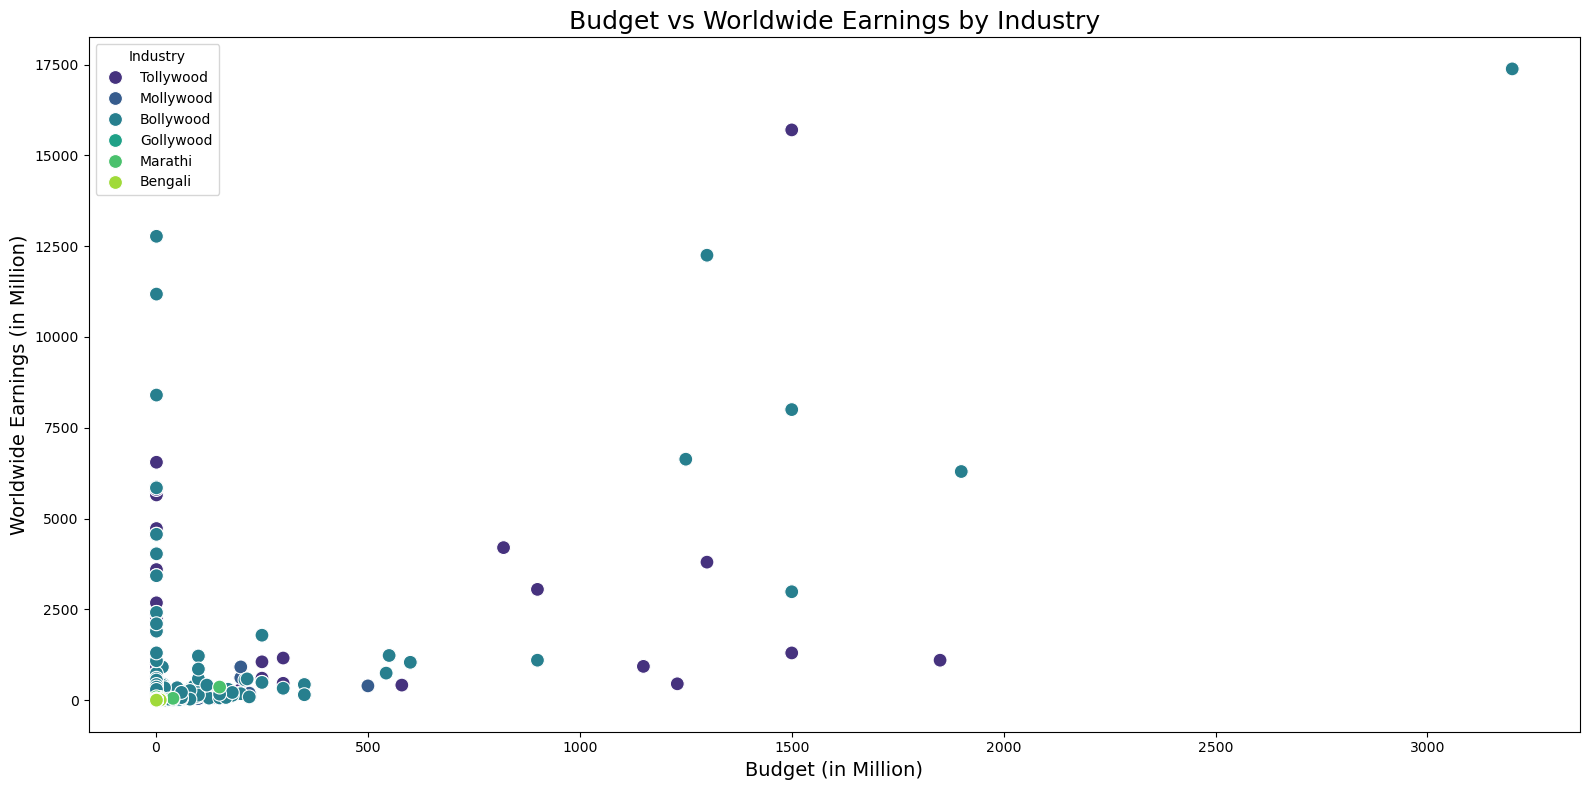

In [514]:
# Scatter plot: Budget vs Worldwide earnings
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Budget', y='Worldwide', data=all_data, hue='Industry', palette='viridis', s=100)

# Title and labels
plt.title("Budget vs Worldwide Earnings by Industry", fontsize=18)
plt.xlabel("Budget (in Million)", fontsize=14)
plt.ylabel("Worldwide Earnings (in Million)", fontsize=14)

plt.tight_layout()
plt.show()

This code generates a **scatter plot** to explore the correlation between a movie's **Budget** and its **Worldwide Earnings**. The budget and earnings are plotted on the `x` and `y` axes, with colors representing different industries (`hue='Industry'`) using the `viridis` palette. Each point is sized at 100 for clarity, and the plot includes a title and axis labels for better understanding.

C:\Users\skist\AppData\Local\Temp\ipykernel_18272\2453392574.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Released Date'] = pd.to_datetime(all_data['Released Date'], errors='coerce')


Invalid dates found: 1611


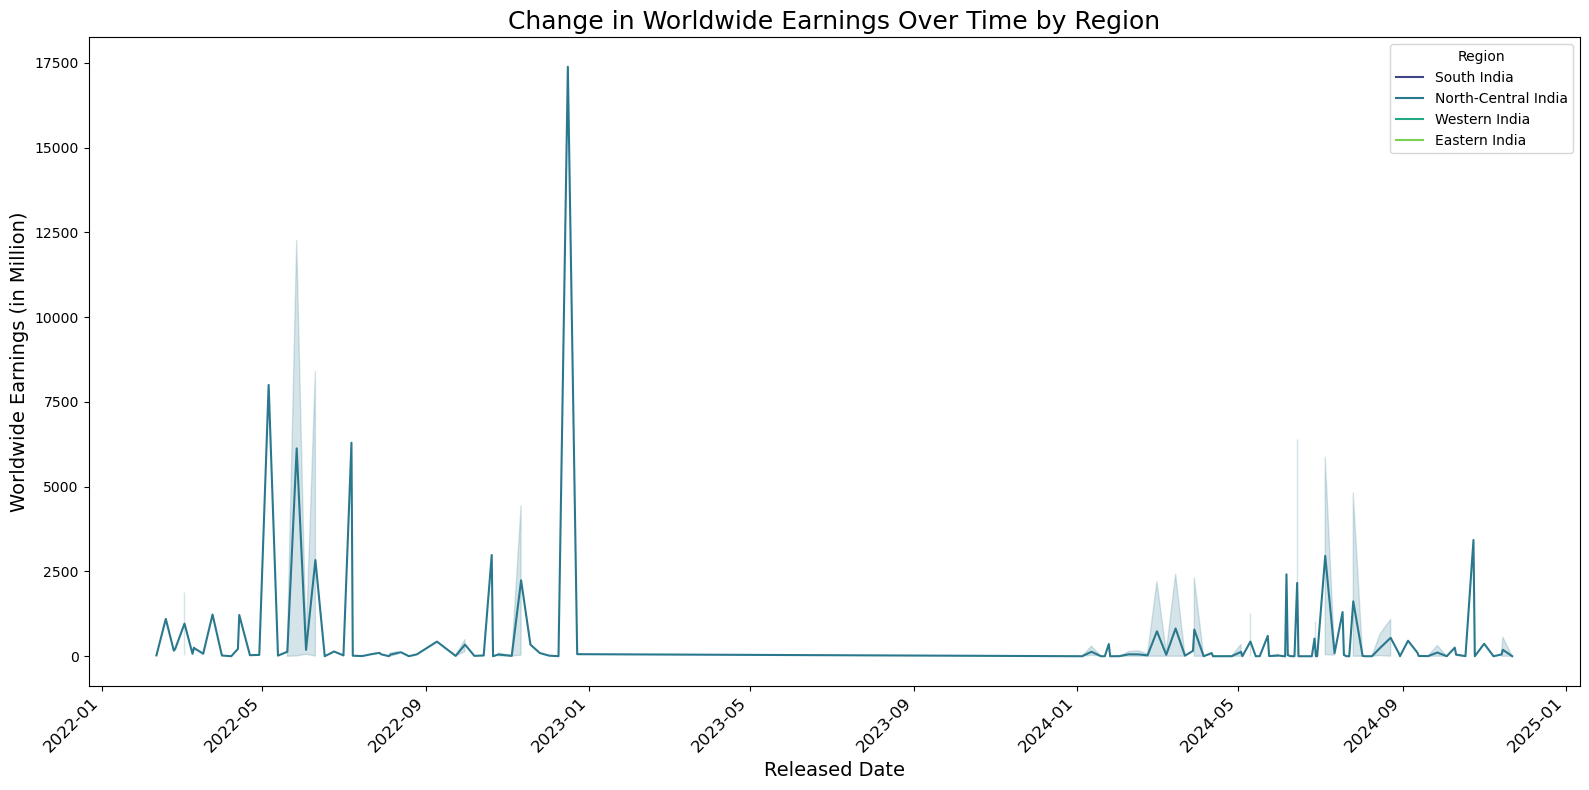

In [516]:
# Convert Released Date to datetime format and handle errors
all_data['Released Date'] = pd.to_datetime(all_data['Released Date'], errors='coerce')

# Check if there are any NaT values after conversion
invalid_dates = all_data[all_data['Released Date'].isna()]
print(f"Invalid dates found: {len(invalid_dates)}")

# Line plot to observe Worldwide earnings over time
plt.figure(figsize=(16, 8))
sns.lineplot(x='Released Date', y='Worldwide', data=all_data, hue='Region', markers=True, palette='viridis')

# Title and labels
plt.title("Change in Worldwide Earnings Over Time by Region", fontsize=18)
plt.xlabel("Released Date", fontsize=14)
plt.ylabel("Worldwide Earnings (in Million)", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

The code converts the `Released Date` column to a datetime format, with invalid dates converted to `NaT` using the `errors='coerce'` option. It checks and prints the number of invalid dates. A line plot is generated to illustrate the trend between `Released Date` and `Worldwide` earnings, with colors representing different `Regions`. The plot includes titles, axis labels, and rotated x-tick labels for improved clarity.

C:\Users\skist\AppData\Local\Temp\ipykernel_18272\864293661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status', y='India Gross', data=all_data, estimator='mean', palette='viridis')


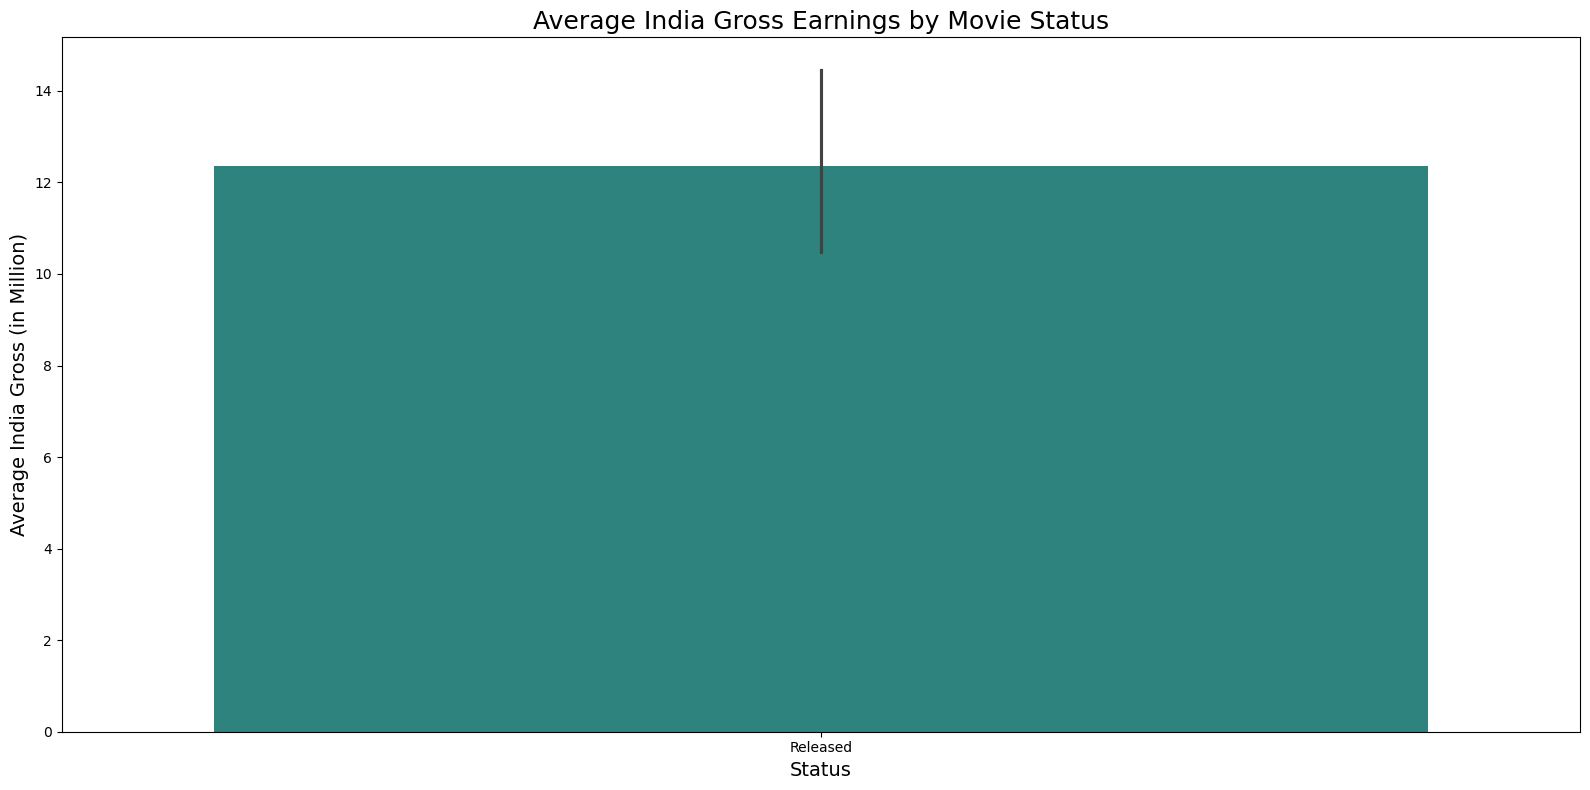

In [520]:
# Bar plot to show average India Gross earnings by Status
plt.figure(figsize=(16, 8))
sns.barplot(x='Status', y='India Gross', data=all_data, estimator='mean', palette='viridis')

# Title and labels
plt.title("Average India Gross Earnings by Movie Status", fontsize=18)
plt.xlabel("Status", fontsize=14)
plt.ylabel("Average India Gross (in Million)", fontsize=14)

plt.tight_layout()
plt.show()

This code generates a **bar plot** to visualize the average `India Gross` earnings by movie `Status`. The `estimator='mean'` is used to calculate the average earnings for each status category. The plot is colored using the `viridis` palette and includes a title and axis labels for better understanding.

<Figure size 1600x800 with 0 Axes>

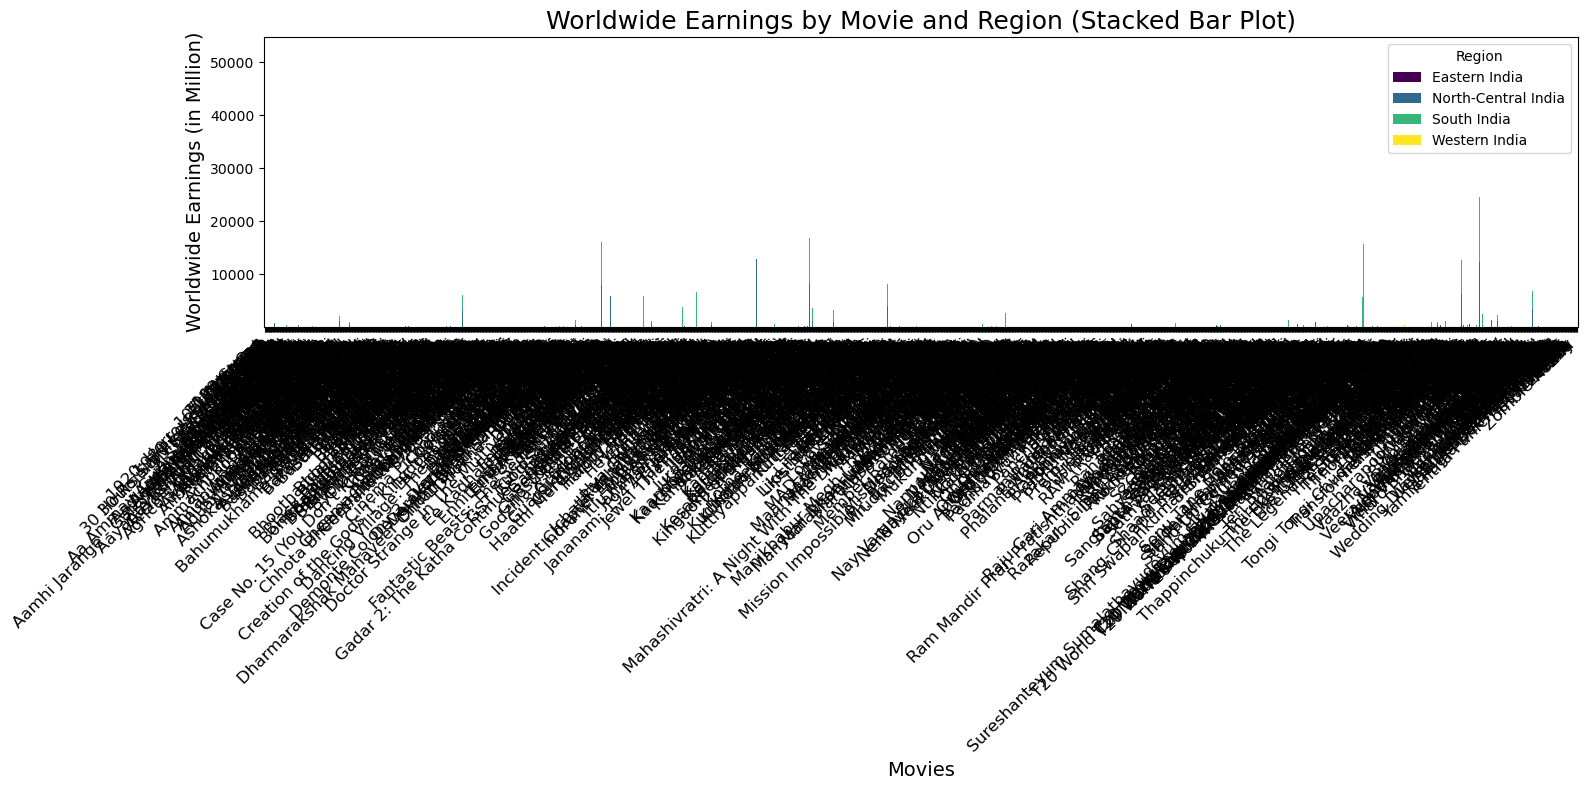

In [521]:
# Stacked bar plot for Worldwide Earnings by Region and Movie
movie_region_earnings = all_data.groupby(['Movie', 'Region'])['Worldwide'].sum().unstack()

plt.figure(figsize=(16, 8))
movie_region_earnings.plot(kind='bar', stacked=True, colormap='viridis', figsize=(16, 8))

# Title and labels
plt.title("Worldwide Earnings by Movie and Region (Stacked Bar Plot)", fontsize=18)
plt.xlabel("Movies", fontsize=14)
plt.ylabel("Worldwide Earnings (in Million)", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

This code creates a **stacked bar plot** to illustrate the total `Worldwid` earnings of movies by region. The data is grouped by `Movie` and `Region`, with the `Worldwide` earnings summed for each combination. Each bar segment represents earnings from a specific region, with the `viridis` colormap used for color. The plot includes a title, labels for the x-axis (Movies) and y-axis (Worldwide Earnings), and rotated x-axis labels for better readability. The `tight_layout()` ensures the plot is neatly arranged within the figure.

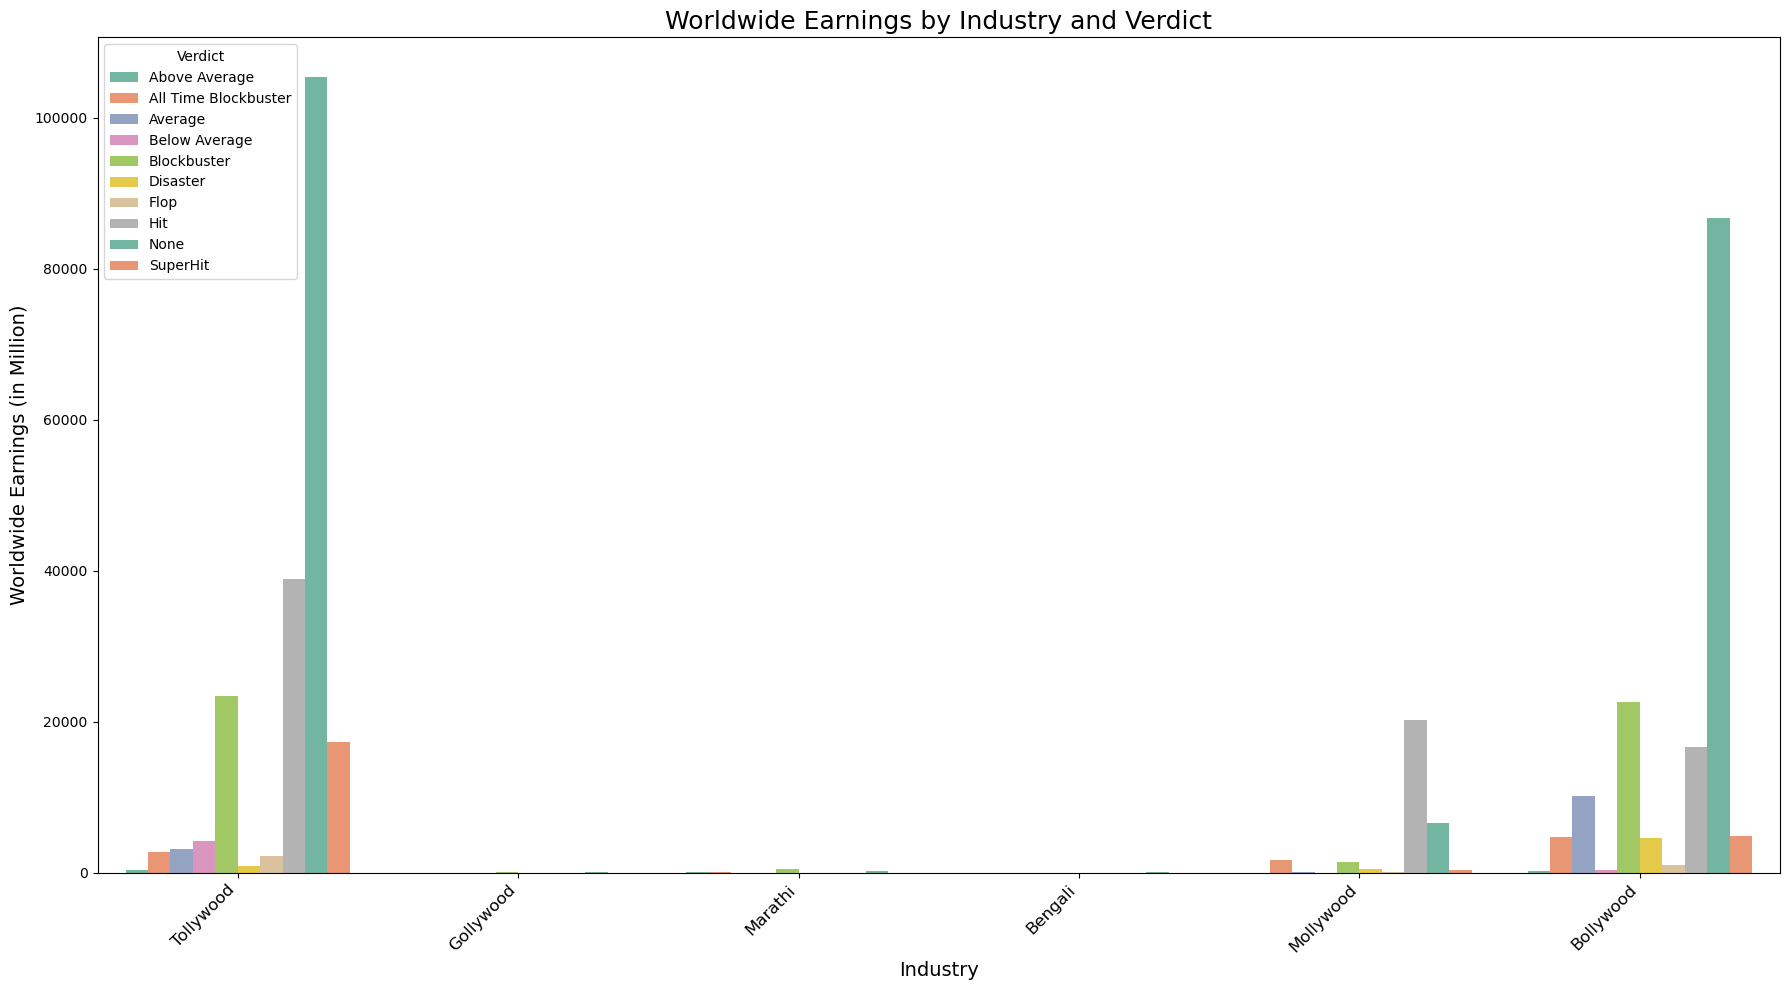

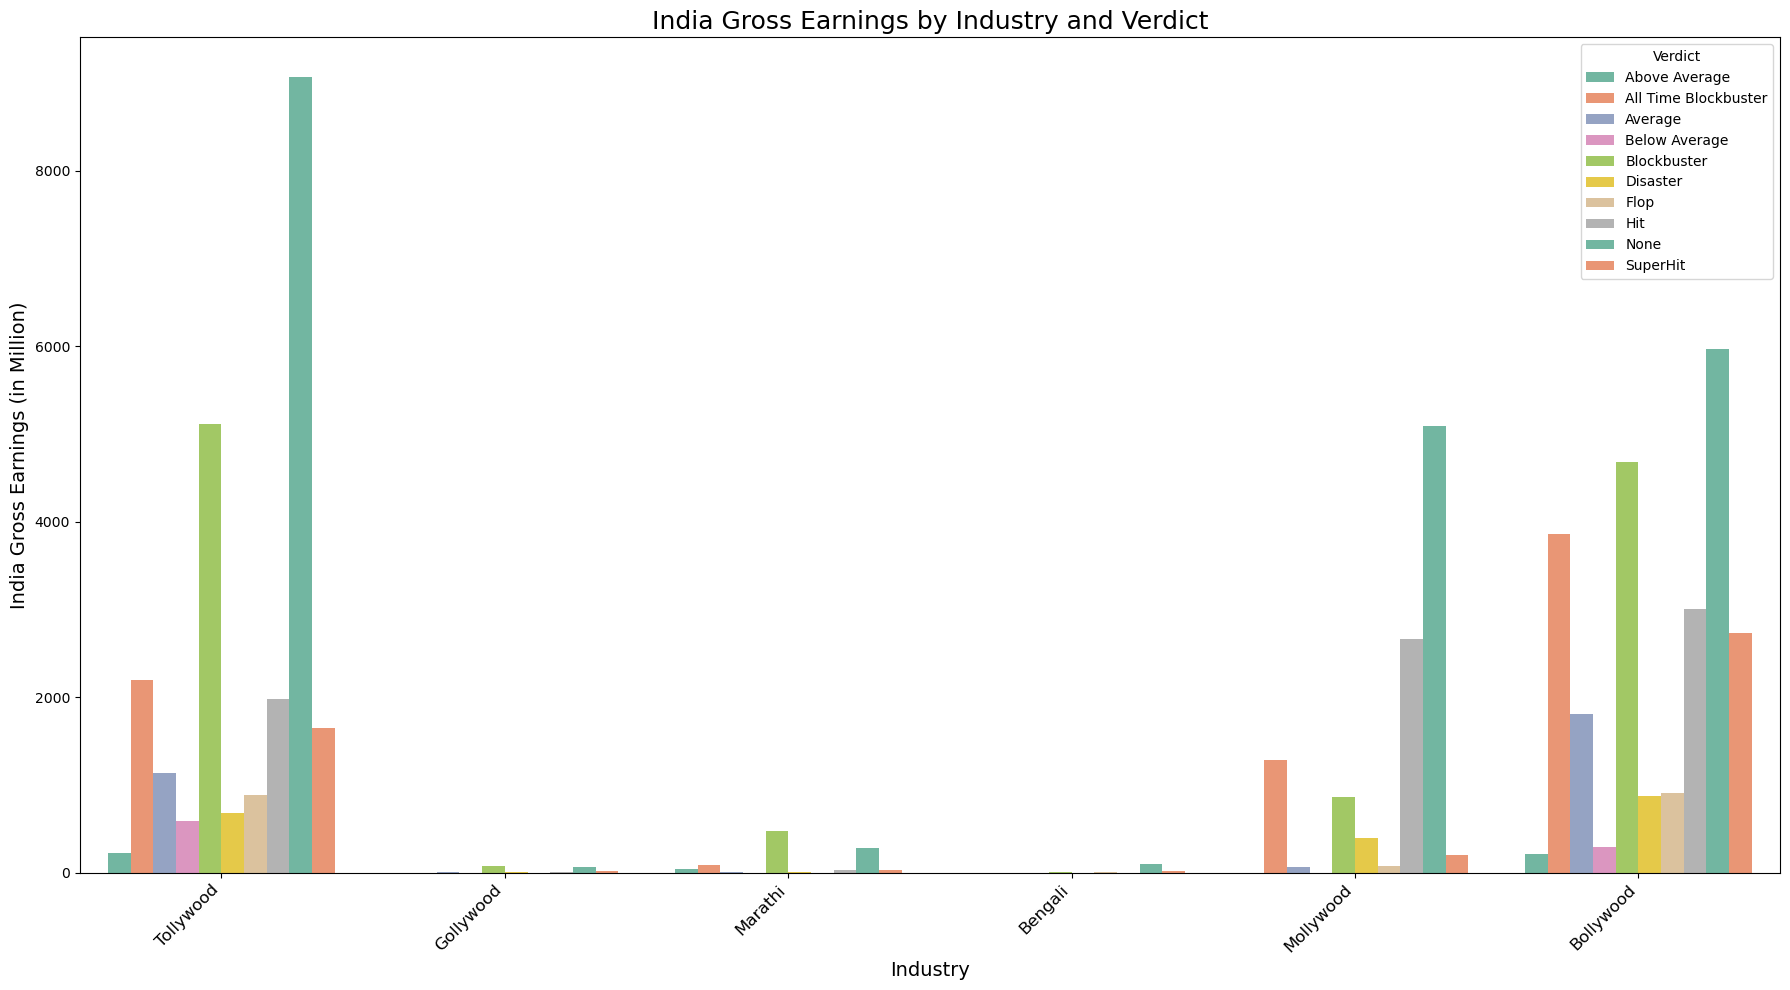

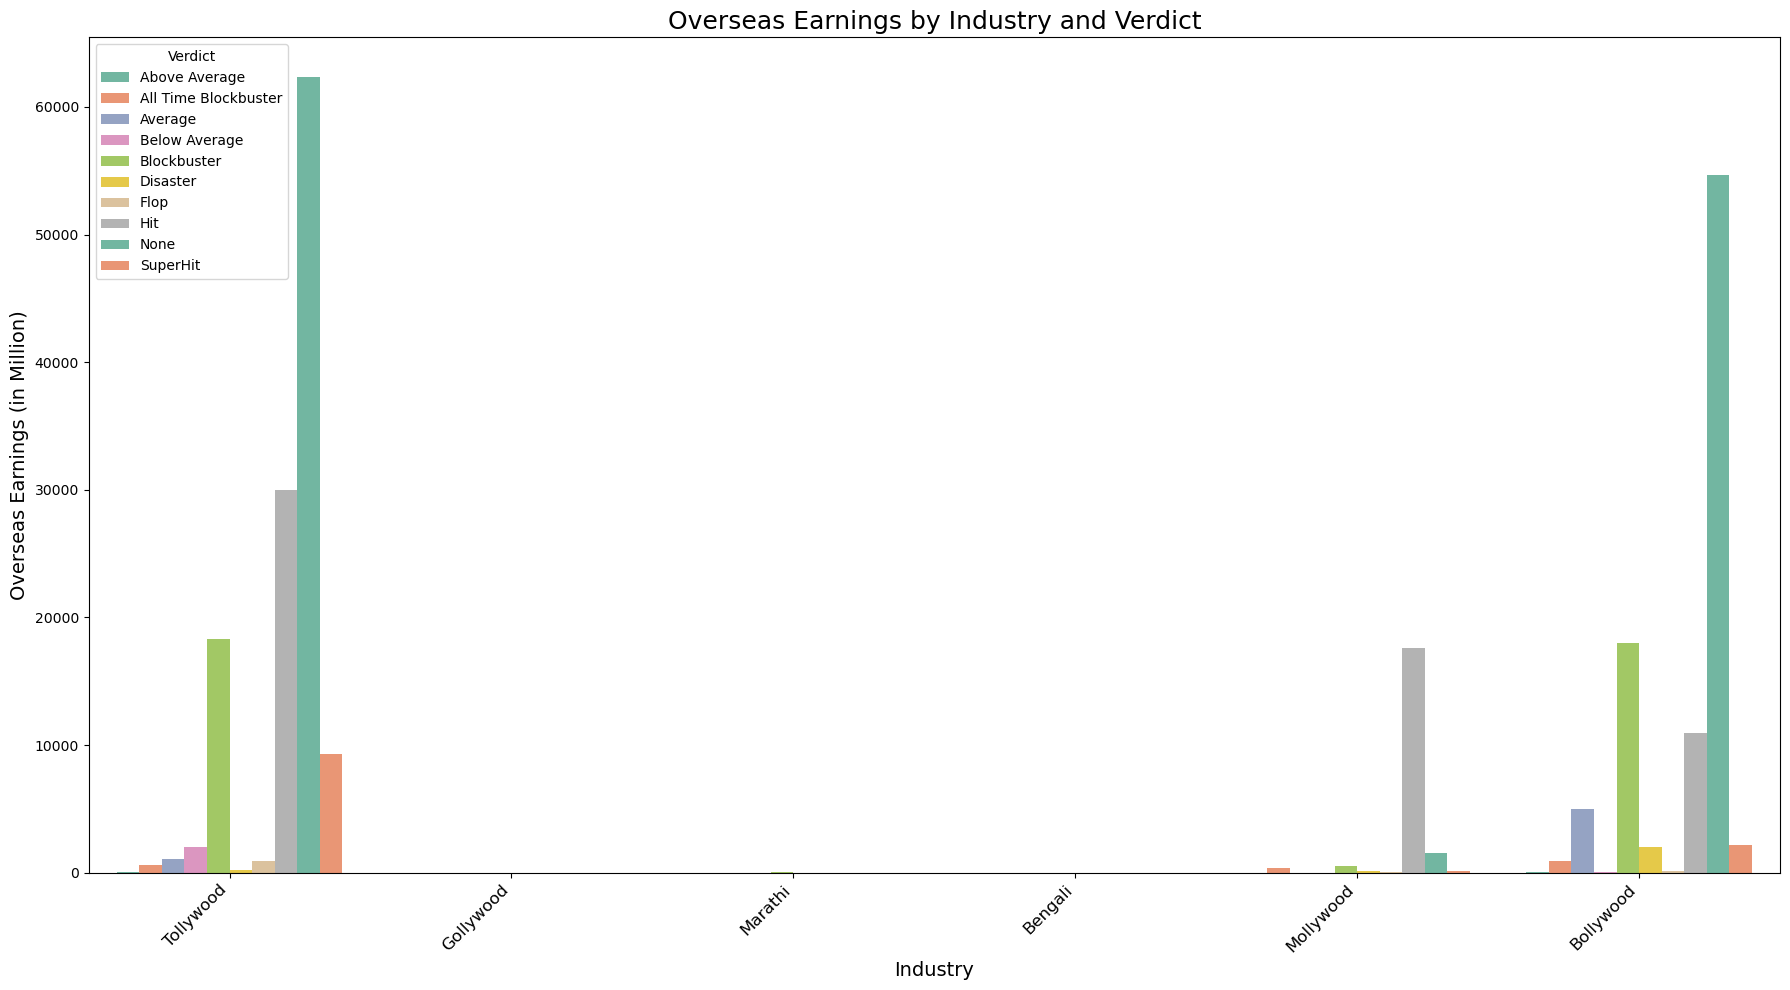

C:\Users\skist\AppData\Local\Temp\ipykernel_9800\1355930207.py:76: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


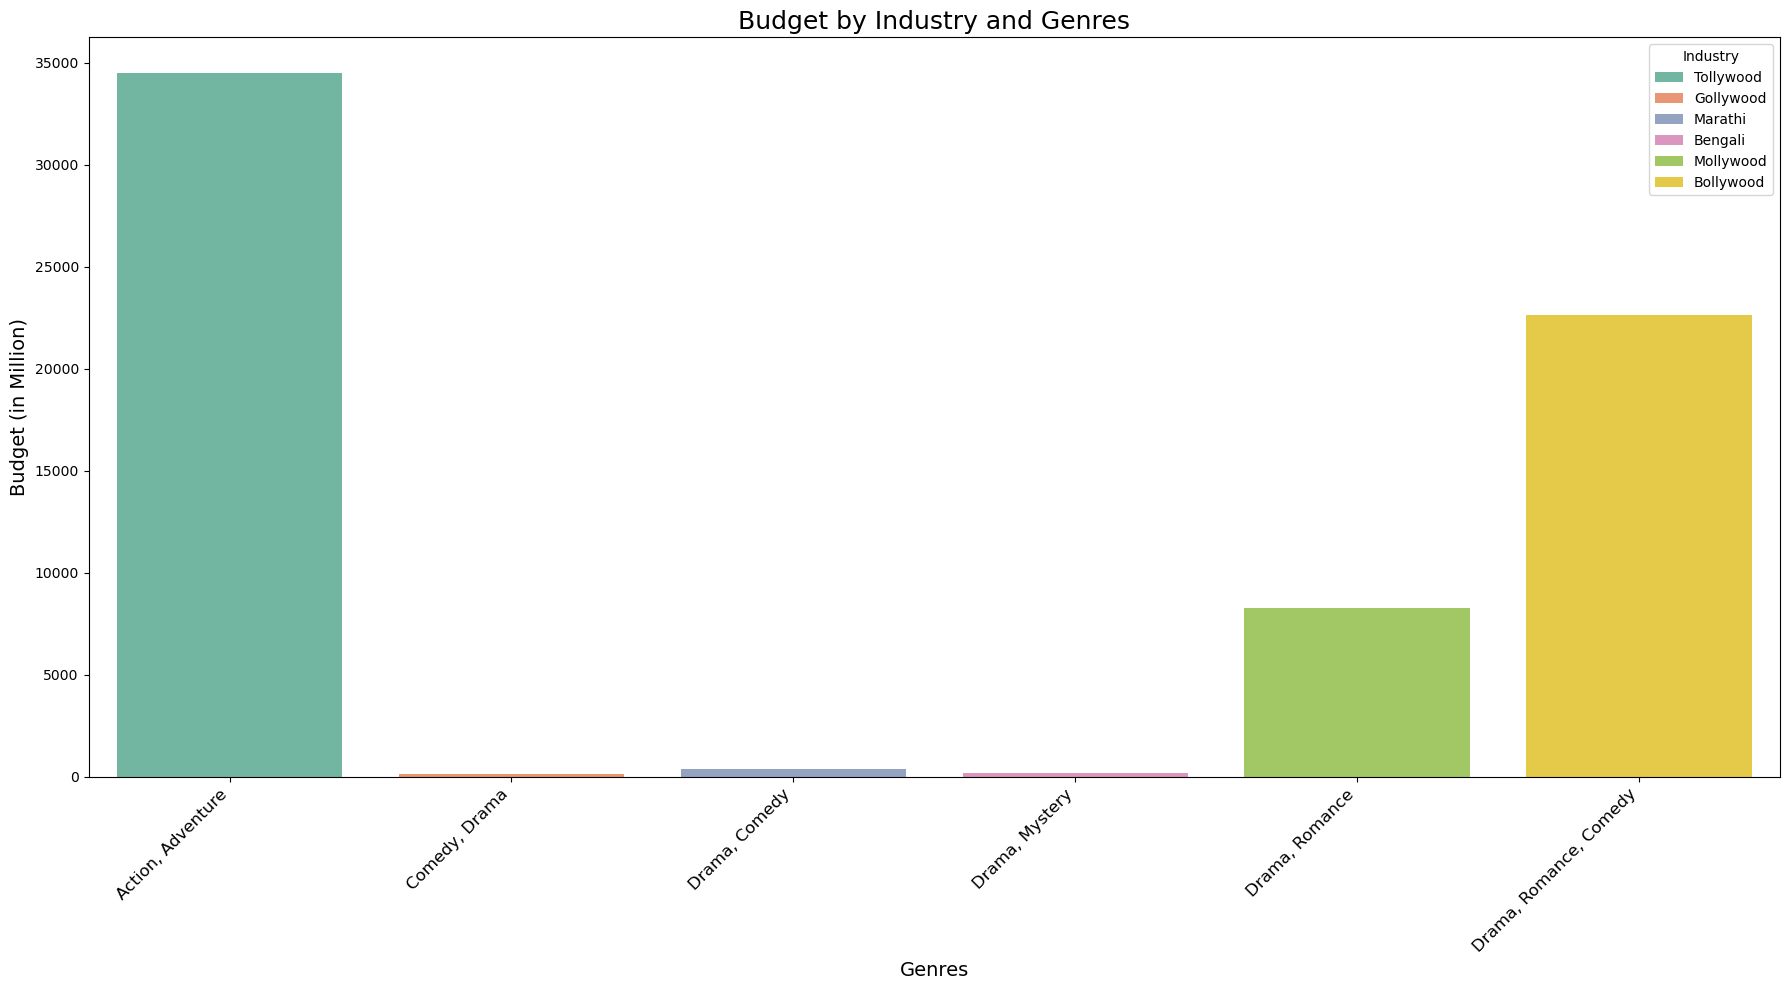

In [49]:
# Grouping the data by 'Genres', 'Verdict', and 'Industry'
genre_verdict_industry_financials = all_data.groupby(['Genres', 'Verdict', 'Industry']).agg({
    'Worldwide': 'sum',
    'India Gross': 'sum',
    'Overseas': 'sum',
    'Budget': 'sum',
    'Movie': lambda x: ', '.join(x)  # Concatenate movie names for each group
}).reset_index()

# Function to annotate bars with movie titles and industry names
def annotate_bars(ax, data, x_col, y_col):
    for p in ax.patches:
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height
        # Annotating only if the height is above a threshold to avoid overlap
        if height > 0:
            genre_label = p.get_x()  # x-axis value for genre
            hue_color = p.get_facecolor()  # Get color for hue
            
            # Matching the genre and hue (industry) values based on the bar position
            matched_row = data[ 
                (data[x_col] == genre_label) & 
                (data['Verdict'] == p.get_label())  # Using the 'Verdict' to match
            ]
            if not matched_row.empty:
                movie_titles = matched_row['Movie'].values[0]
                industry = matched_row['Industry'].values[0]
                # Annotating both movie titles and industry
                annotation_text = f"Movies: {movie_titles}\nIndustry: {industry}"
                ax.annotate(annotation_text, (x, y), ha='center', va='bottom', fontsize=9, rotation=90)

# Set a larger figure size for better visibility
plt.figure(figsize=(18, 10))

# Plotting Worldwide Earnings by Genre and Industry (Industries on X-axis)
sns.barplot(x='Industry', y='Worldwide', hue='Verdict', data=genre_verdict_industry_financials, palette='Set2')
plt.title("Worldwide Earnings by Industry and Verdict", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel("Worldwide Earnings (in Million)", fontsize=14)
plt.xlabel("Industry", fontsize=14)
plt.tight_layout()
annotate_bars(plt.gca(), genre_verdict_industry_financials, 'Industry', 'Worldwide')
plt.show()

# Plotting India Gross Earnings by Genre and Industry (Industries on X-axis)
plt.figure(figsize=(18, 10))
sns.barplot(x='Industry', y='India Gross', hue='Verdict', data=genre_verdict_industry_financials, palette='Set2')
plt.title("India Gross Earnings by Industry and Verdict", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel("India Gross Earnings (in Million)", fontsize=14)
plt.xlabel("Industry", fontsize=14)
plt.tight_layout()
annotate_bars(plt.gca(), genre_verdict_industry_financials, 'Industry', 'India Gross')
plt.show()

# Plotting Overseas Earnings by Genre and Industry (Industries on X-axis)
plt.figure(figsize=(18, 10))
sns.barplot(x='Industry', y='Overseas', hue='Verdict', data=genre_verdict_industry_financials, palette='Set2')
plt.title("Overseas Earnings by Industry and Verdict", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel("Overseas Earnings (in Million)", fontsize=14)
plt.xlabel("Industry", fontsize=14)
plt.tight_layout()
annotate_bars(plt.gca(), genre_verdict_industry_financials, 'Industry', 'Overseas')
plt.show()

# Grouping by 'Genres' and 'Industry' and calculating the sum of the 'Budget'
grouped_data = genre_verdict_industry_financials.groupby(['Genres', 'Industry']).agg({
    'Budget': 'sum',
    'Verdict': 'first',  # Keeping the first verdict value (or you could aggregate in another way)
}).reset_index()

# Plotting the grouped data
plt.figure(figsize=(18, 10))
sns.barplot(
    x='Genres', 
    y='Budget', 
    hue='Industry',  # Color by 'Industry'
    data=grouped_data, 
    palette='Set2', 
    ci=None
)

# Adding title and labels
plt.title("Budget by Industry and Genres", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel("Budget (in Million)", fontsize=14)
plt.xlabel("Genres", fontsize=14)
plt.tight_layout()

# Annotating bars with movies and industry names
annotate_bars(plt.gca(), grouped_data, 'Genres', 'Budget')
plt.show()

In [50]:
genre_verdict_industry_financials = genre_verdict_industry_financials.sort_values(by='Worldwide', ascending=False)
# Displaying the sorted table
genre_verdict_industry_financials

Genres               Verdict   Industry    Worldwide  \
8        Action, Adventure                  None  Tollywood  105402.2430   
48  Drama, Romance, Comedy                  None  Bollywood   86757.2600   
7        Action, Adventure                   Hit  Tollywood   38861.9100   
4        Action, Adventure           Blockbuster  Tollywood   23394.0800   
44  Drama, Romance, Comedy           Blockbuster  Bollywood   22645.5800   
37          Drama, Romance                   Hit  Mollywood   20260.8100   
9        Action, Adventure              SuperHit  Tollywood   17352.6500   
47  Drama, Romance, Comedy                   Hit  Bollywood   16692.3200   
42  Drama, Romance, Comedy               Average  Bollywood   10111.0400   
38          Drama, Romance                  None  Mollywood    6622.4420   
49  Drama, Romance, Comedy              SuperHit  Bollywood    4915.0000   
41  Drama, Romance, Comedy  All Time Blockbuster  Bollywood    4789.7100   
45  Drama, Romance, Comedy              Disaster  Bollywood    4571.0500   
3        Action, Adventure         Below Average  Tollywood    4143.2700   
2        Action, Adventure               Average  Tollywood    3182.1800   
1        Action, Adventure  All Time Blockbuster  Tollywood    2794.9600   
6        Action, Adventure                  Flop  Tollywood    2185.1000   
31          Drama, Romance  All Time Blockbuster  Mollywood    1636.0600   
34          Drama, Romance           Blockbuster  Mollywood    1357.1500   
46  Drama, Romance, Comedy                  Flop  Bollywood    1057.9200   
5        Action, Adventure              Disaster  Tollywood     889.8351   
35          Drama, Romance              Disaster  Mollywood     525.7800   
20           Drama, Comedy           Blockbuster    Marathi     507.6000   
43  Drama, Romance, Comedy         Below Average  Bollywood     357.5600   
39          Drama, Romance              SuperHit  Mollywood     326.7600   
0        Action, Adventure         Above Average  Tollywood     301.3100   
24           Drama, Comedy                  None    Marathi     257.8600   
40  Drama, Romance, Comedy         Above Average  Bollywood     231.8100   
36          Drama, Romance                  Flop  Mollywood     101.9800   
29          Drama, Mystery                  None    Bengali      95.8800   
18           Drama, Comedy  All Time Blockbuster    Marathi      90.5000   
11           Comedy, Drama           Blockbuster  Gollywood      76.1000   
32          Drama, Romance               Average  Mollywood      62.2500   
15           Comedy, Drama                  None  Gollywood      60.7400   
17           Drama, Comedy         Above Average    Marathi      50.3000   
25           Drama, Comedy              SuperHit    Marathi      27.7000   
23           Drama, Comedy                   Hit    Marathi      26.1500   
30          Drama, Mystery              SuperHit    Bengali      22.9000   
16           Comedy, Drama              SuperHit  Gollywood      14.0000   
14           Comedy, Drama                   Hit  Gollywood      12.8000   
10           Comedy, Drama               Average  Gollywood      12.6700   
19           Drama, Comedy               Average    Marathi      11.4000   
26          Drama, Mystery           Blockbuster    Bengali       9.7000   
21           Drama, Comedy              Disaster    Marathi       4.3300   
12           Comedy, Drama              Disaster  Gollywood       3.1860   
28          Drama, Mystery                  Flop    Bengali       2.8800   
33          Drama, Romance         Below Average  Mollywood       2.5200   
27          Drama, Mystery              Disaster    Bengali       1.1125   
22           Drama, Comedy                  Flop    Marathi       0.2000   
13           Comedy, Drama                  Flop  Gollywood       0.1800   

    India Gross   Overseas    Budget  \
8     9067.5930  62334.970  11671.50   
48    5966.8200  54691.690   5143.00   
7     1984.5900  29980.

The bar plots above examine movie earnings based on **Genres**, **Verdict**, and **Industry**, highlighting which genres, such as **Comedy** or **Romance**, deliver the highest profits. By analyzing **Worldwide Earnings**, **India Gross**, **Overseas Earnings**, and **Budget**, we can identify the most profitable genres. The **Verdict** (positive or negative) offers insights into audience reception, while the **Industry** comparison reveals financial performance across different sectors. Annotating movie titles on the bars helps pinpoint specific movies, allowing us to determine which genre, like Comedy or Romance, generates the highest profit.

# **Conclusion**
This project offers a thorough analysis of movie earnings across regions, languages, and industries. It explores global and regional revenue trends, budget efficiency, and the impact of original and dubbed languages on financial performance. Notable findings include the dominance of specific languages in international markets, disparities in industry success, and the significance of dubbing in boosting regional engagement. The correlations between financial metrics and movie statuses provide valuable insights for shaping production and marketing strategies. These findings enable stakeholders to identify profitable regions, optimize budget allocation, and develop audience-centric content, fostering informed, data-driven decisions in the film industry.

In [19]:
genre_verdict_industry_financials = all_data.groupby(['Genres', 'Verdict', 'Industry', 'Released Date']).agg({
    'Worldwide': 'sum',
    'India Gross': 'sum',
    'Overseas': 'sum',
    'Budget': 'sum',
    'Movie': lambda x: ', '.join(x)  # Concatenate movie names for each group
}).reset_index()


In [20]:
genre_verdict_industry_financials


Genres               Verdict   Industry Released Date  \
0          Action, Adventure         Above Average  Tollywood        13 Apr   
1          Action, Adventure         Above Average  Tollywood        21 Oct   
2          Action, Adventure         Above Average  Tollywood        28 Feb   
3          Action, Adventure         Above Average  Tollywood        29 Sep   
4          Action, Adventure  All Time Blockbuster  Tollywood        03 Jun   
...                      ...                   ...        ...           ...   
1103  Drama, Romance, Comedy              SuperHit  Bollywood        19 May   
1104  Drama, Romance, Comedy              SuperHit  Bollywood        19 Oct   
1105  Drama, Romance, Comedy              SuperHit  Bollywood   23 Feb 2024   
1106  Drama, Romance, Comedy              SuperHit  Bollywood   25 Mar 2022   
1107  Drama, Romance, Comedy              SuperHit  Bollywood        29 Sep   

     Worldwide India Gross Overseas Budget             Movie  
0       216.58      151.58       65    150             Beast  
1        41.13       32.13        9     30            Prince  
2            8         7.5      0.5      4               HIT  
3         35.6        29.6        6     30    Naane Varuvean  
4       414.43      289.43      125    120            Vikram  
...        ...         ...      ...    ...               ...  
1103    334.06       96.65   237.41     23      Hindi Medium  
1104    912.75       81.28   831.47     15  Secret Superstar  
1105    105.15       92.65     12.5      1       Article 370  
1106      1230      915.85   314.15    550               RRR  
1107    227.51      192.43    35.08     65          Judwaa 2  

[1108 rows x 9 columns]

In [48]:
 Print the updated DataFrame to verify the results
all_data[['Worldwide', 'India Gross', 'Overseas', 'Budget', 
                'Worldwide Profit', 'India Gross Profit', 'Overseas Profit', 
                'India Telugu Net', 'India Malayalam Net', 'India Hindi Net', 
                'India Gujarati Net', 'India Marathi Net', 'India Bengali Net', 
                'India Telugu Net Profit', 'India Malayalam Net Profit', 
                'India Hindi Net Profit', 'India Gujarati Net Profit', 
                'India Marathi Net Profit', 'India Bengali Net Profit', 
                'Released Date', 'Original Languages', 'Dubbed Languages', 'Industry']]

Worldwide  India Gross  Overseas  Budget  Worldwide Profit  \
0         22.30        21.10      1.20    20.0              2.30   
1          0.35         0.30      0.05     3.0             -2.65   
2          0.07         0.07      0.00     2.0             -1.93   
3          0.25         0.23      0.02     2.0             -1.75   
4          0.35         0.30      0.05     3.0             -2.65   
...         ...          ...       ...     ...               ...   
1914       0.00         0.00      0.00     1.0             -1.00   
1915       0.12         0.12      0.00     1.0             -0.88   
1916       0.36         0.36      0.00     1.0             -0.64   
1917       0.28         0.28      0.00     1.0             -0.72   
1918       0.53         0.53      0.00     1.0             -0.47   

      India Gross Profit  Overseas Profit  India Telugu Net  \
0                   1.10           -18.80             18.10   
1                  -2.70            -2.95              0.25   
2                  -1.93            -2.00              0.05   
3                  -1.77            -1.98              0.20   
4                  -2.70            -2.95              0.25   
...                  ...              ...               ...   
1914               -1.00            -1.00              0.00   
1915               -0.88            -1.00              0.00   
1916               -0.64            -1.00              0.00   
1917               -0.72            -1.00              0.00   
1918               -0.47            -1.00              0.00   

      India Malayalam Net  India Hindi Net  India Gujarati Net  \
0                     0.0              0.0                 0.0   
1                     0.0              0.0                 0.0   
2                     0.0              0.0                 0.0   
3                     0.0              0.0                 0.0   
4                     0.0              0.0                 0.0   
...                   ...              ...                 ...   
1914                  0.0              0.0                 0.0   
1915                  0.0              0.0                 0.0   
1916                  0.0              0.0                 0.0   
1917                  0.0              0.0                 0.0   
1918                  0.0              0.0                 0.0   

      India Marathi Net  India Bengali Net  India Telugu Net Profit  \
0                   0.0               0.00                    -1.90   
1                   0.0               0.00                    -2.75   
2                   0.0               0.00                    -1.95   
3                   0.0               0.00                    -1.80   
4                   0.0               0.00                    -2.75   
...                 ...                ...                      ...   
1914                0.0               0.00                    -1.00   
1915                0.0               0.11                    -1.00   
1916                0.0               0.31                    -1.00   
1917                0.0               0.27                    -1.00   
1918                0.0               0.48                    -1.00   

      India Malayalam Net Profit  India Hindi Net Profit  \
0                          -20.0                   -20.0   
1                           -3.0                    -3.0   
2                           -2.0                    -2.0   
3                           -2.0                    -2.0   
4                           -3.0                    -3.0   
...                          ...                     ...   
1914                        -1.0                    -1.0   
1915                        -1.0                    -1.0   
1916                        -1.0                    -1.0   
1917                        -1.0                    -1.0   
1918                        -1.0                    -1.0   

      India Gujarati Net Profit  India Marathi Net Profit  \
0   

In [55]:
# Calculate profits for various categories
profit_columns = {
    'Worldwide Profit': 'Worldwide',
    'India Gross Profit': 'India Gross',
    'Overseas Profit': 'Overseas',
    'India Telugu Net Profit': 'India Telugu Net',
    'India Malayalam Net Profit': 'India Malayalam Net',
    'India Hindi Net Profit': 'India Hindi Net',
    'India Gujarati Net Profit': 'India Gujarati Net',
    'India Marathi Net Profit': 'India Marathi Net',
    'India Bengali Net Profit': 'India Bengali Net'
}

for profit_col, gross_col in profit_columns.items():
    all_data[profit_col] = all_data[gross_col] - all_data['Budget']


In [58]:
group_columns = ['Original Languages', 'Dubbed Languages', 'Industry']

for col in group_columns:
    grouped_profit = all_data.groupby(col)[list(profit_columns.keys())].mean()
    print(f"Average Profits by {col}:")
    print(grouped_profit)


Average Profits by Original Languages:
                    Worldwide Profit  India Gross Profit  Overseas Profit  \
Original Languages                                                          
Bengali                    -0.452434           -0.430474        -1.330464   
Gujarati                    0.352306            0.402757        -1.252703   
Hindi                     309.555036            4.075537       170.505609   
Malayalam                  63.607337            6.675455        33.808287   
Marathi                     3.827248            3.725436        -2.434564   
Telugu                    223.754077          -14.974964       123.151674   

                    India Telugu Net Profit  India Malayalam Net Profit  \
Original Languages                                                        
Bengali                           -1.331126                   -1.331126   
Gujarati                          -1.270270                   -1.270270   
Hindi                            -54.068019 

In [59]:
grouped_profit

Worldwide Profit  India Gross Profit  Overseas Profit  \
Industry                                                           
Bengali           -0.452434           -0.430474        -1.330464   
Bollywood        309.555036            4.075537       170.505609   
Gollywood          0.352306            0.402757        -1.252703   
Marathi            3.827248            3.725436        -2.434564   
Mollywood         63.607337            6.675455        33.808287   
Tollywood        223.754077          -14.974964       123.151674   

           India Telugu Net Profit  India Malayalam Net Profit  \
Industry                                                         
Bengali                  -1.331126                   -1.331126   
Bollywood               -54.068019                  -54.068019   
Gollywood                -1.270270                   -1.270270   
Marathi                  -2.731544                   -2.731544   
Mollywood               -23.200140                  -17.591270   
Tollywood               -37.707216                  -47.109823   

           India Hindi Net Profit  India Gujarati Net Profit  \
Industry                                                       
Bengali                 -1.331126                  -1.331126   
Bollywood              -20.924632                 -54.068019   
Gollywood               -1.270270                   0.436387   
Marathi                 -2.731544                  -2.731544   
Mollywood              -23.200140                 -23.200140   
Tollywood              -47.109823                 -47.109823   

           India Marathi Net Profit  India Bengali Net Profit  
Industry                                                       
Bengali                   -1.331126                 -0.552509  
Bollywood                -54.068019                -54.068019  
Gollywood                 -1.270270                 -1.270270  
Marathi                    0.610067                 -2.731544  
Mollywood                -23.200140                -23.200140  
Tollywood                -47.109823                -47.109823

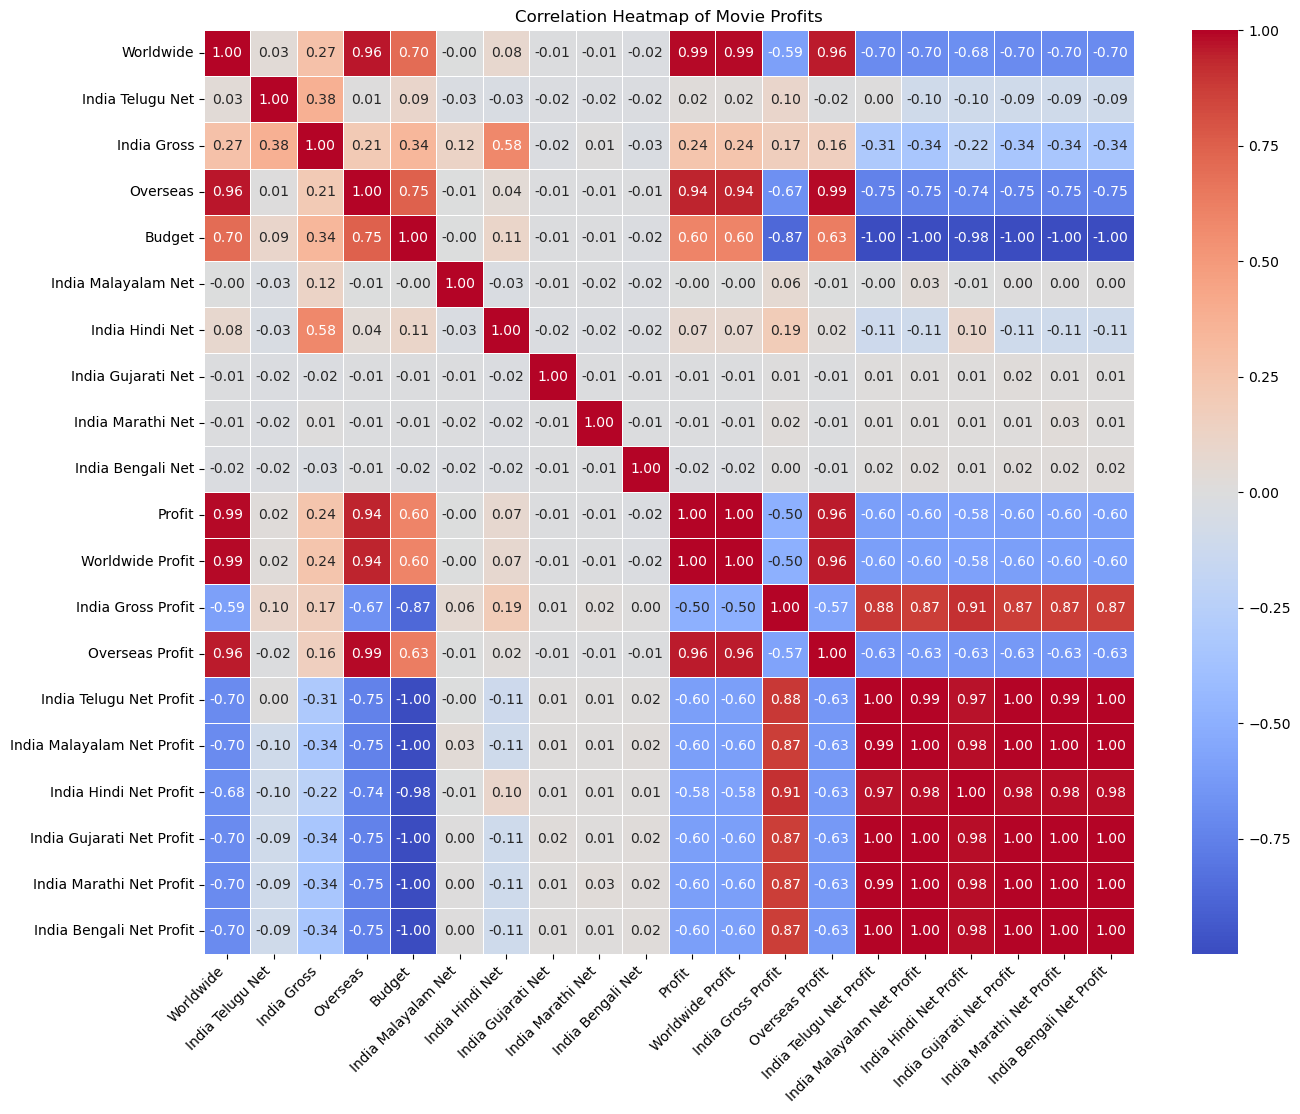

In [60]:
# Select numeric columns for correlation matrix
numeric_cols = all_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = all_data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of Movie Profits')
plt.show()

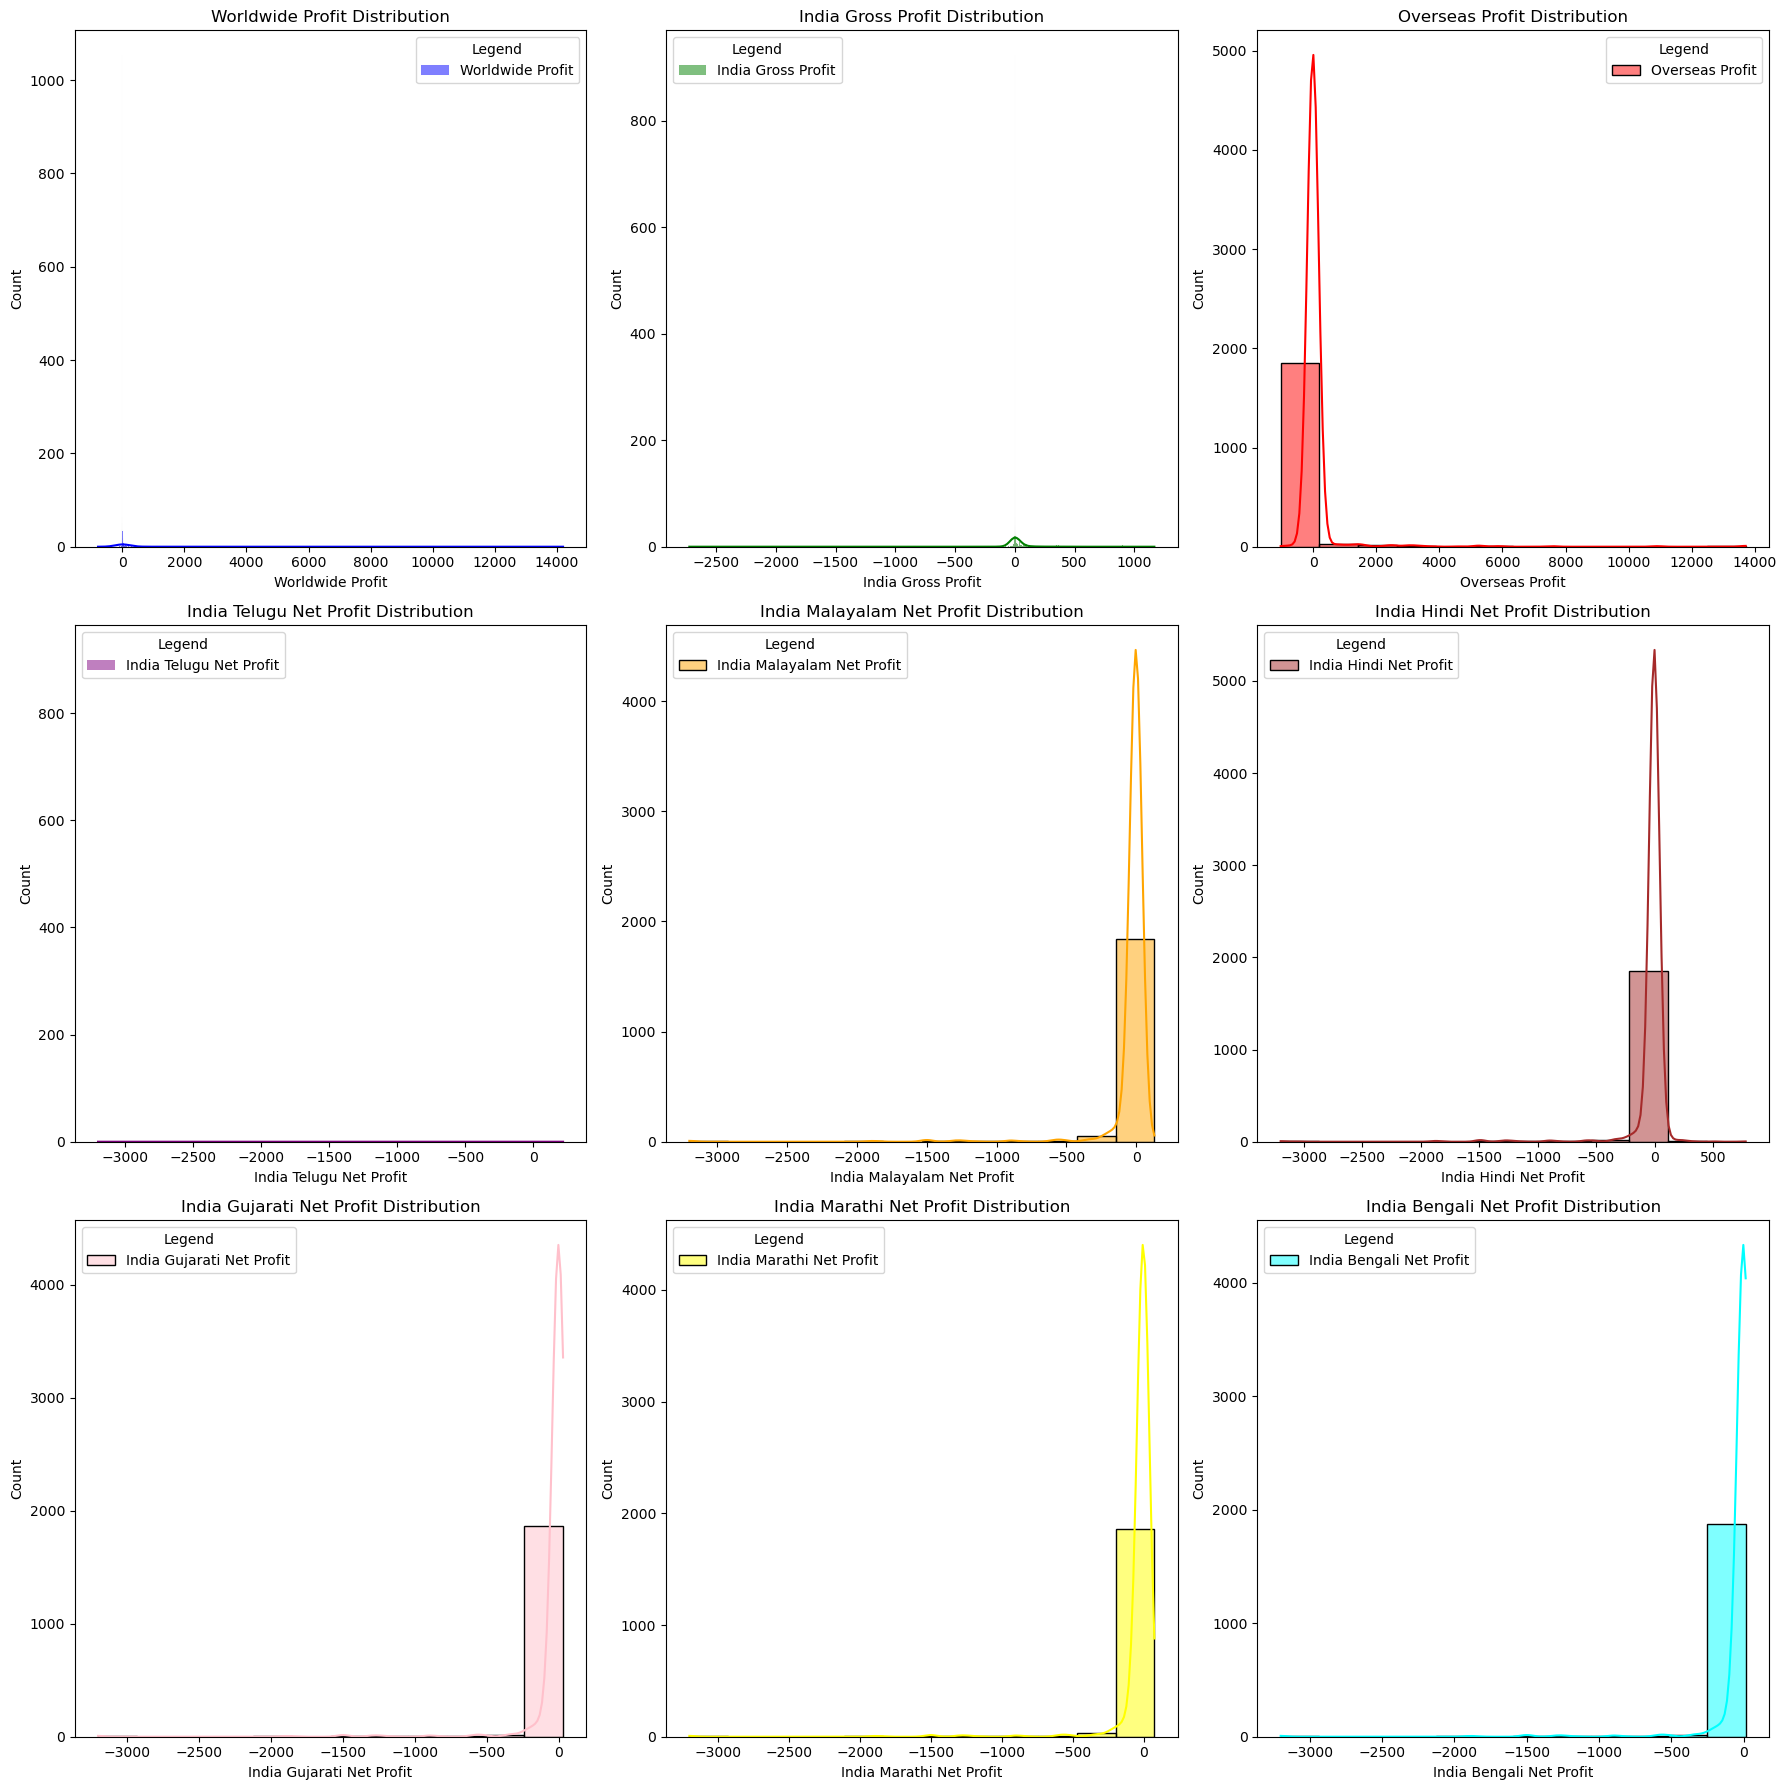

In [63]:
fig, ax = plt.subplots(3, 3, figsize=(18, 18))

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'yellow', 'cyan']
titles = list(profit_columns.keys())

for idx, col in enumerate(profit_columns.keys()):
    sns.histplot(all_data[col], kde=True, ax=ax[idx//3, idx%3], color=colors[idx], label=col)
    ax[idx//3, idx%3].set_title(f'{titles[idx]} Distribution')
    ax[idx//3, idx%3].legend(title="Legend")  # Add legend

plt.tight_layout()
plt.show()

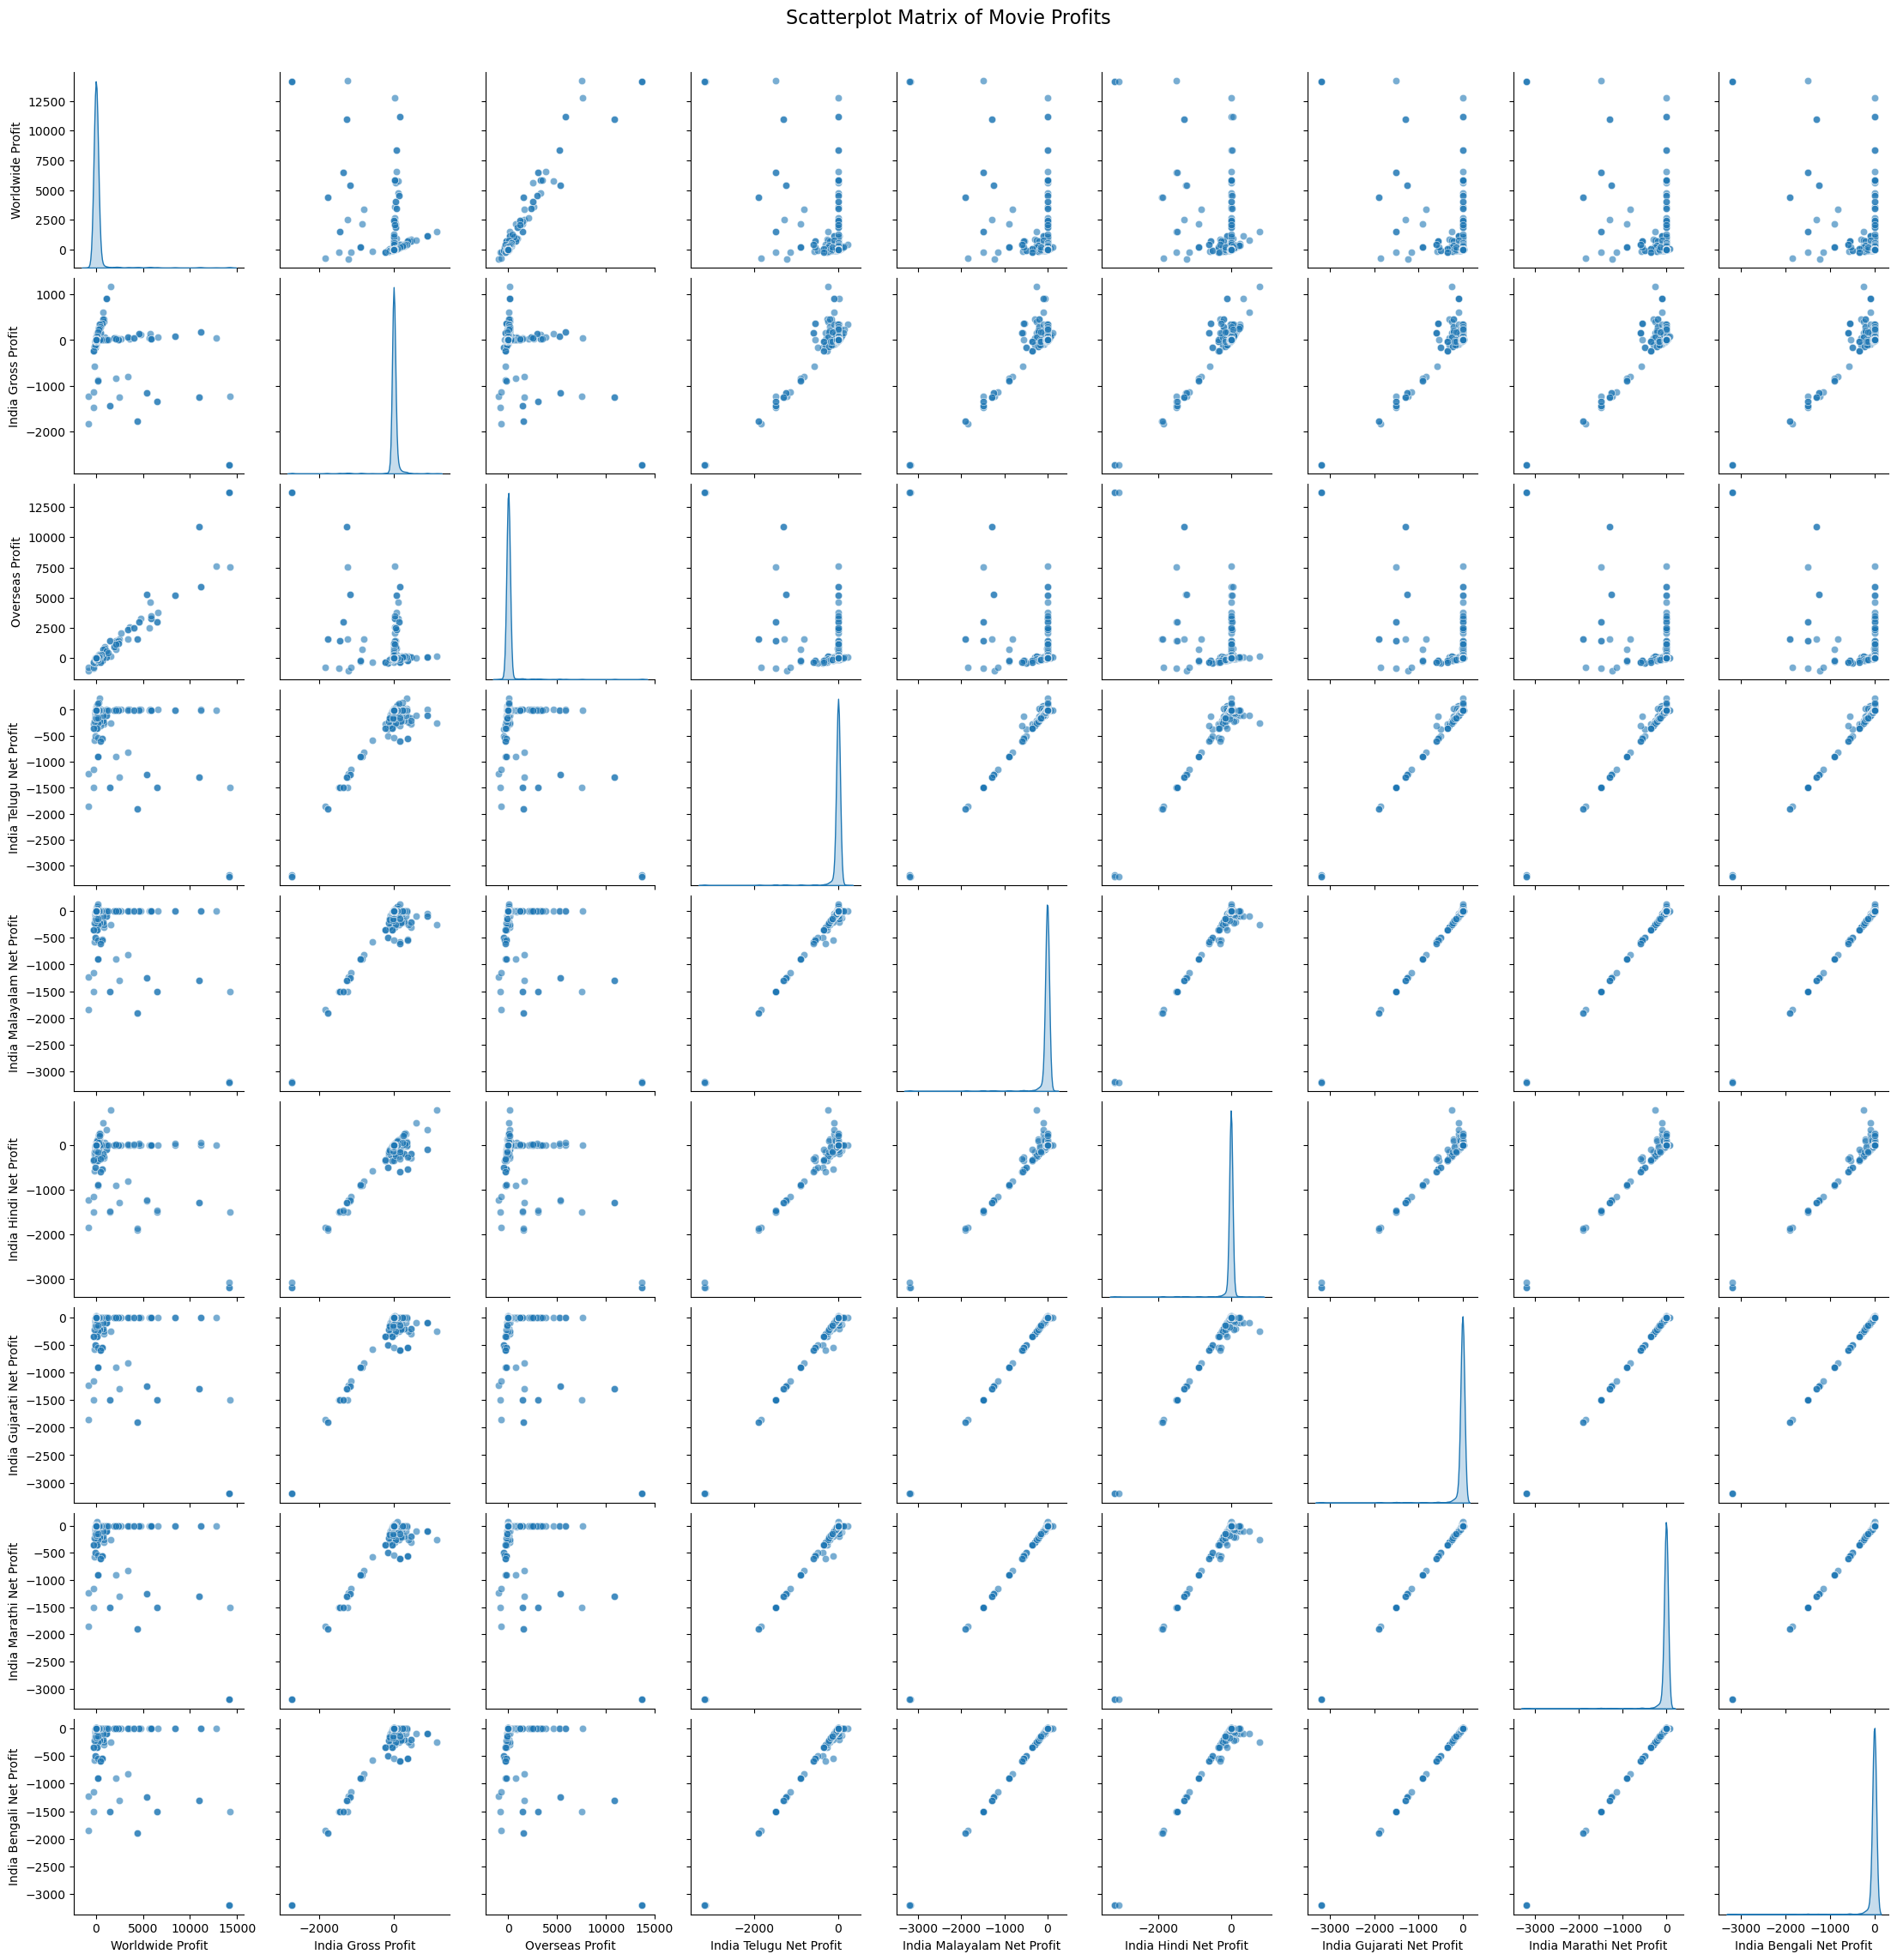

In [62]:
# Select columns for the scatterplot matrix
scatter_cols = list(profit_columns.keys())

scatterplot_matrix = sns.pairplot(
    all_data[scatter_cols], 
    diag_kind='kde', 
    plot_kws={'alpha': 0.6}, 
    height=2.5
)

scatterplot_matrix.fig.suptitle('Scatterplot Matrix of Movie Profits', y=1.02, fontsize=16)
plt.show()
